In [138]:
import pandas as pd
tweets_copy=pd.read_excel('Final_data_refined_Nov.xlsx')

In [139]:
tweets_copy1=tweets_copy

In [141]:
tweets_copy.shape

(95578, 14)

In [142]:
tweets_copy=tweets_copy.drop(['Companies','Sectors','Locations','Sector_hash','ScreenName','Sector_inf','Sector_hash','Themes','Tweethistoryid','id'],axis=1)

In [143]:
tweets_copy=tweets_copy.drop(['Unnamed: 0'],axis=1)

In [144]:
tweets_copy=tweets_copy.drop(['Unnamed: 0.1','Unnamed: 0.1.1'],axis=1)

In [145]:
tweets_copy.isna().sum()

Sector_key        0
TweetFulltext    23
dtype: int64

In [146]:
tweets_copy.dropna(subset=['TweetFulltext'],inplace=True)

In [147]:
from twitter_pre import TwitterPreprocessor
text=[]
for sentence in tweets_copy['TweetFulltext']:
    p = TwitterPreprocessor(sentence)
    #p.fully_preprocess()
    p.remove_mentions().remove_urls().remove_punctuation().remove_mentions().remove_twitter_reserved_words().remove_single_letter_words().remove_blank_spaces().remove_stopwords().remove_numbers()
    #p.remove_punctuation().remove_urls().remove_mentions().remove_twitter_reserved_words().remove_single_letter_words().remove_blank_spaces().remove_stopwords().remove_numbers()
    text.append(p.text)
tweets_copy['TweetFulltext1']=text

In [148]:
tweets_copy.drop_duplicates(['TweetFulltext1'])

,Sector_key,TweetFulltext,TweetFulltext1
0,ADS,Our expansive product lines are used on nearly...,Our expansive product lines used nearly every ...
1,ADS,Attending #MROAM? Meet the Parker Aerospace te...,Attending MROAM Meet Parker Aerospace team sta...
2,ADS,Will you be attending the Asian Business Aviat...,Will attending Asian Business Aviation Confere...
3,ADS,Our world-class Customer Support Operations is...,Our worldclass Customer Support Operations ded...
4,ADS,Attending #SNF19 this week? Come talk with our...,Attending SNF19 week Come talk Aerospace team ...
5,ADS,"As we go through this first week of April, we ...",As go first week April wanted hype things Wend...
6,ADS,To showcase how DE&amp;S is collaborating with...,To showcase DEampS collaborating deliver Ajax ...
7,ADS,Italian Eurofighters conduct first scramble in...,Italian Eurofighters conduct first scramble Mo...
8,ADS,Welcome to the #Mediterranean ✈️\nAn #E-2D Haw...,Welcome Mediterranean ✈️ An E2D Hawkeye Blueta...
9,ADS,".@USArmy Maj. Gen. Roger L. Cloutier Jr., @USA...",Maj Gen Roger Cloutier Jr commanding general g...


In [634]:
tweets_copy.TweetFulltext1[0]

'Our expansive product lines used nearly every Aircraft flying around world Meet us today MROAM stand learn capabilities Aviation'

In [628]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm

In [690]:
# train=tweets_copy[tweets_copy['Sector_key']=='Technology']
# train.dropna(inplace=True)
# y_map={'Technology':0}
# train['Sector_key']=[y_map[i] for i in train['Sector_key']]
# test1=train['Sector_key']
# train=train.drop(['Sector_key'],axis=1)
# #mapper = DataFrameMapper([('Bios',TfidfVectorizer())])
# #X=mapper.fit_transform(train)
# tfidfconverter = TfidfVectorizer()
# X=tfidfconverter.fit_transform(train['TweetFulltext'])
# # X_train, X_test, y_train, y_test = train_test_split(X,test1,test_size=0.3)
# # from sklearn.ensemble import RandomForestClassifier
# #import xgboost as xgb
# # rfc = RandomForestClassifier()
# # rfc.fit(X_train,y_train)
# #oneclass = svm.OneClassSVM(nu=0.3,gamma=1)
# #oneclass.fit(X)
# xgb_model = xgb.XGBClassifier(objective="binary:logistic")
# xgb_model.fit(X_train,y_train)

In [935]:
from twitter_pre import TwitterPreprocessor
p=TwitterPreprocessor('How #ArtificialIntelligence  via by of rt @sandeep is helping #farmers in Indian villages')
p.remove_mentions().remove_urls().remove_punctuation().remove_mentions().remove_twitter_reserved_words().remove_single_letter_words().remove_blank_spaces().remove_stopwords().remove_numbers()
#p.fully_preprocess()
p.text

'How ArtificialIntelligence via rt helping farmers Indian villages'

In [769]:
p.remove_punctuation().text.replace('[{}]'.format(p.text.punctuation), '')

AttributeError: 'str' object has no attribute 'punctuation'

In [764]:
from twitter_pre import TwitterPreprocessor
p=TwitterPreprocessor('Running a successful Instagram giveaway doesn’t have to be rocket science. Beyond sticking to Instagram’s promotional guidelines, brands need to know exactly what to look out for prior to crafting their campaign. https://t.co/saWn8PmJow #instagrammarketing https://t.co/9xAiaxGG5O')
p.remove_mentions().remove_urls().remove_punctuation().remove_twitter_reserved_words().remove_single_letter_words().remove_blank_spaces().remove_stopwords().remove_numbers()
p.text

'Running successful Instagram giveaway ’ rocket science Beyond sticking Instagram ’ promotional guidelines brands need know exactly look prior crafting campaign instagrammarketing'

In [614]:
import re

In [831]:
re.sub(pattern=re.compile(r'@\w+ *?'), repl='', string='How #ArtificialIntelligence @sandeep is helping #farmers in Indian villages')

'How #ArtificialIntelligence  is helping #farmers in Indian villages'

In [ ]:
'How #ArtificialIntelligence @sandeep is helping #farmers in Indian villages'.translate(None, " ?.!/;:")

In [844]:
re.sub('[ ]', '', 'How #ArtificialIntelligence @sandeep is helping #farmers in Indian villages')

'How#ArtificialIntelligence@sandeepishelping#farmersinIndianvillages'

In [874]:
text3=[]
for h in tweets_copy['TweetFulltext']:
    text3.append(' '.join(set(re.findall(r'@.*?(?=\s|$)',h))))
tweets_copy['mentions']=text3

In [869]:
' '.join(set(re.findall(r'@.*?(?=\s|$)','How #ArtificialIntelligence #ArtificialIntelligence @sandeep is helping #farmers in Indian villages')))

'@sandeep'

In [859]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 150
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(tweets_copy['hashtags'].values)
X = tokenizer.texts_to_sequences(tweets_copy['hashtags'].values)
X = sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

In [860]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.1))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1))
#model.add(BatchNormalization())
model.add(Dense(16, activation='softmax'))
opt=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 2
batch_size = 64

history = model.fit(X,train_labels, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 156349 samples, validate on 17373 samples
Epoch 1/2
156349/156349 [==============================] - 783s 5ms/step - loss: 0.1178 - accuracy: 0.9700 - val_loss: 0.0032 - val_accuracy: 0.9991
Epoch 2/2
156349/156349 [==============================] - 775s 5ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 8.6887e-04 - val_accuracy: 0.9998


In [191]:
xgb_model.predict(tfidfconverter.transform([v]))

array([5])

In [86]:
oneclass.predict(tfidfconverter.transform([v]))

array([-1], dtype=int64)

In [152]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [153]:
train=tweets_copy

In [637]:
c=train['Sector_key']
enc = LabelBinarizer().fit(c)
encoded = enc.transform(c)
encoded

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [154]:
c=train['Sector_key']
enc = LabelEncoder().fit(c)
encoded = enc.transform(c)
encoded

array([0, 0, 0, ..., 9, 0, 0])

In [155]:
enc.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

array(['ADS', 'Automotive', 'Banking and Payments', 'Construction',
       'Consumer', 'Foodservices', 'Insurance', 'Medical Devices',
       'Mining', 'Oil and Gas', 'Packaging', 'Pharma', 'Power', 'Retail',
       'Technology', 'Travel and Tourism'], dtype=object)

In [641]:
enc.transform(['ADS','Technology'])

array([ 0, 14], dtype=int64)

In [642]:
import xgboost as xgb

In [643]:
train=tweets_copy
c=train['Sector_key']
enc = LabelEncoder().fit(c)
encoded = enc.transform(c)
test1=encoded
train=train.drop(['TweetFulltext','Sector_key','Unnamed: 0'],axis=1)
#mapper = DataFrameMapper([('Bios',TfidfVectorizer())])
#X=mapper.fit_transform(train)
tfidfconverter = TfidfVectorizer()
tfidfconverter.fit(train['TweetFulltext1'])
X=tfidfconverter.transform(train['TweetFulltext1'])
X_train, X_test, y_train, y_test = train_test_split(X,test1,test_size=0.3)
from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier()
# rfc.fit(X_train,y_train)
xgb_model = xgb.XGBClassifier(objective="binary:logistic")
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [485]:
enc.inverse_transform([14])[0]

'Technology'

In [178]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [179]:
predictions=xgb_model.predict(X_test)

In [180]:
accuracy=accuracy_score(y_test,predictions)
matrix=confusion_matrix(y_test,predictions)

In [182]:
accuracy

0.9899648866972389

In [ ]:
['ADS', 'Automotive', 'Banking and Payments', 'Construction',
       'Consumer', 'Foodservices', 'Insurance', 'Medical Devices',
       'Mining', 'Oil and Gas', 'Packaging', 'Pharma', 'Power', 'Retail',
       'Technology', 'Travel and Tourism']

In [686]:
p=TwitterPreprocessor("Digital Innovation: Chatbots, RPA and ML in Business Service - Press Release - Digital Journal https://t.co/TQRYrKMyll #innovation #disruption #chatbots #AI #ML #DL #RPA #tech #technology #RT #digital #DX #DigitalTransformation")
p.remove_urls().remove_punctuation().remove_mentions().remove_twitter_reserved_words().remove_single_letter_words().remove_blank_spaces().remove_stopwords().remove_numbers()
p.text

'Digital Innovation Chatbots RPA ML Business Service Press Release Digital Journal innovation disruption chatbots AI ML DL RPA tech technology digital DX DigitalTransformation'

In [703]:
# np.argsort(xgb_model.predict_proba(tfidfconverter.transform([p.text])))[0][-3:]

In [704]:
# np.argsort(model.predict(padded))[0][-3:]

In [649]:
import pickle
filename = 'finalized_model_xgb_text_removed_mentions.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

In [368]:
seq = tokenizer.texts_to_sequences([p.text])
padded = sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)

In [396]:
pred

array([[1.1535255e-04, 3.5075584e-04, 3.0817950e-04, 2.2157661e-03,
        9.6233249e-05, 3.8696344e-05, 1.0610704e-03, 1.4726208e-04,
        2.3363325e-05, 1.0672305e-04, 9.1970927e-05, 1.0412647e-01,
        9.0945308e-05, 2.1748559e-03, 8.8902813e-01, 2.4219757e-05]],
      dtype=float32)

In [370]:
# max_words = 50000
# max_len = 250
# sequences = tok.texts_to_sequences(p.text)
# sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [360]:
import numpy as np

In [399]:
enc.inverse_transform(model.predict_classes(padded))
#np.argmax(model.predict(sequences_matrix),axis=1)

array(['Technology'], dtype=object)

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import pandas as pd

In [373]:
# max_words = 5000
# max_len = 1024
# tok = Tokenizer(num_words=max_words)
# tok.fit_on_texts(train['TweetFulltext1'])
# sequences = tok.texts_to_sequences(train['TweetFulltext1'])
# sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [364]:
sequences_matrix.shape

(174, 250)

In [921]:
tweets_copy

,Unnamed: 0,Sector_key,TweetFulltext,TweetFulltext1,hashtags,mentions
0,0,ADS,Our expansive product lines are used on nearly...,Our expansive product lines used nearly every ...,"#Aircraft #MROAM, #Aviation",
1,1,ADS,Attending #MROAM? Meet the Parker Aerospace te...,Attending MROAM Meet Parker Aerospace team sta...,#Aviation #MROAM? #Aerospace,
2,2,ADS,Will you be attending the Asian Business Aviat...,Will attending Asian Business Aviation Confere...,#Aviation,
3,3,ADS,Our world-class Customer Support Operations is...,Our worldclass Customer Support Operations ded...,#MROAM #Aircraft #Aviation,@AvWeekEvents
4,4,ADS,Attending #SNF19 this week? Come talk with our...,Attending SNF19 week Come talk Aerospace team ...,#SNF19 #Aerospace #Aviation,
5,5,ADS,"As we go through this first week of April, we ...",As go first week April wanted hype things Wend...,#ThrowbackThursday #STEM #AirForce #AFResearch...,
6,6,ADS,To showcase how DE&amp;S is collaborating with...,To showcase DEampS collaborating deliver Ajax ...,#Defence,@BritishArmy @DefenceHQ
7,7,ADS,Italian Eurofighters conduct first scramble in...,Italian Eurofighters conduct first scramble Mo...,#militarynews #aviation #Eurofighter #defence ...,@LDO_Aircraft
8,8,ADS,Welcome to the #Mediterranean ✈️\nAn #E-2D Haw...,Welcome Mediterranean ✈️ An E2D Hawkeye Blueta...,#E-2D #USSAbrahamLincoln #US6thFleet #first #M...,@CVN_72
9,9,ADS,".@USArmy Maj. Gen. Roger L. Cloutier Jr., @USA...",Maj Gen Roger Cloutier Jr commanding general g...,#OneTeam #PhoenixExpress #MaritimeSecurity #Na...,@USArmy @USArmyAfrica


In [150]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 150
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(tweets_copy['TweetFulltext1'].values)
X = tokenizer.texts_to_sequences(tweets_copy['TweetFulltext1'].values)
X = sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

In [776]:
X.shape

(173722, 250)

In [778]:
from keras.utils import to_categorical
train_labels = to_categorical(test1)
X_train, X_test, y_train, y_test = train_test_split(X,train_labels,test_size=0.3)

In [325]:
# def RNN():
#     inputs = Input(name='inputs',shape=[max_len])
#     layer = Embedding(max_words,50,input_length=max_len)(inputs)
#     layer = LSTM(64)(layer)
#     layer = Dense(256,name='FC1')(layer)
#     layer = Activation('relu')(layer)
#     layer = Dropout(0.5)(layer)
#     layer = Dense(16,name='out_layer')(layer)
#     layer = Activation('softmax')(layer)
#     model = Model(inputs=inputs,outputs=layer)
#     return model

# model = RNN()
# model.summary()
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# model.fit(X_train,y_train,batch_size=128,epochs=5,
#           validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
# model.save('LSTM_text.h5')

In [709]:
from keras.models import Sequential,Model
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [771]:
import keras
from keras.layers.normalization import BatchNormalization

In [781]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.1))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1))
#model.add(BatchNormalization())
model.add(Dense(16, activation='softmax'))
opt=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 2
batch_size = 64

history = model.fit(X,train_labels, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 156349 samples, validate on 17373 samples
Epoch 1/2
156349/156349 [==============================] - 775s 5ms/step - loss: 0.1315 - accuracy: 0.9660 - val_loss: 0.0033 - val_accuracy: 0.9996
Epoch 2/2
156349/156349 [==============================] - 902s 6ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 5.8947e-04 - val_accuracy: 0.9999


In [737]:
df3[['Tweet_text1','Tweet Text'][0:500]].to_excel('Small input.xlsx')

C:\Users\kasandeep\AppData\Local\Continuum\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:915: UserWarning: Ignoring URL 'https://t.co/8JhdsfrWSJ%20I%20am%20thoroughly%20embarrassed%20to%20report%20that%20it%20totally%20didn’t%20click%20to%20me,%20even%20as%20a%20remote%20possibility%20staring%20me%20right%20in%20the%20face,%20that%20@nvidia%20NVDLA%20***was%20an%20open%20source%20compiler%20emitting%20FPGA/ASIC%20verilog%20working%20on%20Amazon%20F1%20instances%20WAT***' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
C:\Users\kasandeep\AppData\Local\Continuum\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:915: UserWarning: Ignoring URL 'https://t.co/ZCJqEr7QN5%20In%20the%20first%20policy%20statement%20on%20compensation%20among%20cardiologists,%20@ACCinTouch%20called%20for%20more%20equity.%20Among%20the%20recommendations:%20healthcare%20facilities%20should%20not%20even%20ask%20salary%20history%20&%20not%20focus%20on

In [735]:
df3

,Sector,Tweet History ID,Tweet Text,Sector Screener,IC Screener,Tweet URL,Tweet_text1,output_lstm_top_3,output_top3
0,Banking & Payments,159406096,"Jis baat ka darr the wohi hua, @PaytmMall sent...","paytm,","paytm,",abhishek,Jis baat ka darr wohi hua sent used product ev...,"[Automotive, Travel and Tourism, Technology]","[Technology, Travel and Tourism, Foodservices]"
1,Banking & Payments,159389254,RT @MarkCrypto5: #XCARD #mbmtoken #Blockchain ...,"#CardPayments, #payments,","#CardPayments, #Crypto, #Fintech,",daviddoughty,XCARD mbmtoken Blockchain Crypto Payments BTC ...,"[Automotive, Travel and Tourism, Technology]","[Travel and Tourism, Foodservices, Technology]"
2,Banking & Payments,159376868,When @Medium deplatformed me and removed all 1...,"paypal,","paypal,",martingeddes,When deplatformed removed articles view wasnt ...,"[Automotive, Travel and Tourism, Technology]","[Technology, Travel and Tourism, Foodservices]"
3,Banking & Payments,159408271,RT @psb_dc: Will be interesting to see how thi...,"#payments, Alipay,","#Fintech, Alipay,",SpirosMargaris,Will interesting see unfolds world Alipay Tenc...,"[Automotive, Travel and Tourism, Technology]","[Travel and Tourism, Foodservices, Banking and..."
4,Banking & Payments,159389252,RT @BORAMSCI: #XCARD is the most convenient al...,"#CardPayments, #payments, credit card, digital...","#CardPayments, #Crypto, #Fintech, credit card,...",daviddoughty,XCARD convenient allinone digital wallet crypt...,"[Automotive, Travel and Tourism, Technology]","[Travel and Tourism, Foodservices, Banking and..."
5,Banking & Payments,159372076,RT @UrsBolt: The fight for dominance in #China...,"#MobilePayments, #payments,","#MobilePayments,",WFSULLIVAN3,The fight dominance Chinas mobile payments mar...,"[Automotive, Travel and Tourism, Technology]","[Technology, Travel and Tourism, Foodservices]"
6,Banking & Payments,159398380,RT @psb_dc: Will be interesting to see how thi...,"#payments, Alipay,","#Fintech, Alipay,",KMcDSAP,Will interesting see unfolds world Alipay Tenc...,"[Automotive, Travel and Tourism, Technology]","[Travel and Tourism, Foodservices, Banking and..."
7,Banking & Payments,159382076,"You had one job, Square ... >> Toronto busines...","Mobile payment,","Mobile payment,",johnkoetsier,You one job Square Toronto business owner lose...,"[Automotive, Travel and Tourism, Technology]","[Technology, Travel and Tourism, Foodservices]"
8,Banking & Payments,159367146,RT @UrsBolt: The fight for dominance in #China...,"#MobilePayments, #payments,","#MobilePayments,",SpirosMargaris,The fight dominance Chinas mobile payments mar...,"[Automotive, Travel and Tourism, Technology]","[Technology, Travel and Tourism, Foodservices]"
9,Banking & Payments,159400272,RT @psb_dc: Will be interesting to see how thi...,"#payments, Alipay,","#Fintech, Alipay,",jblefevre60,Will interesting see unfolds world Alipay Tenc...,"[Automotive, Travel and Tourism, Technology]","[Travel and Tourism, Foodservices, Banking and..."


In [782]:
model.save('Lstm_250_removed_mentions.h5')

In [950]:
y=tokenizer.texts_to_sequences(['Digital Innovation Chatbots RPA ML Business Service Press Release Digital Journal innovation disruption chatbots AI ML DL RPA tech technology digital DX DigitalTransformation'])
z=sequence.pad_sequences(y, maxlen=MAX_SEQUENCE_LENGTH)
model.predict_classes([z])

array([14], dtype=int64)

In [108]:
from keras.models import load_model

Using TensorFlow backend.


In [387]:
load_model('Lstm_250.h5')

In [347]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

52117/52117 [==============================] - 68s 1ms/step
Test set
  Loss: 0.011
  Accuracy: 0.998


In [340]:
# ypred = model.predict(X_test)
# accr = model.evaluate(X_test,Y_test)
# print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

In [665]:
df3=pd.read_excel(r'C:\Users\kasandeep\Downloads\Microsoft.SkypeApp_kzf8qxf38zg5c!App\All\Full_length_Sector_test.xlsx')

In [666]:
df3['Tweet Text'][0]

'Jis baat ka darr the wohi hua, @PaytmMall sent me a used product which is not even working :( - my 31000 INR is now stuck with them, please retweet this and tag @Paytm @Paytmcare to support me, thanks in advance to #gtufamily https://t.co/zL6ZobgxWe'

In [667]:
df3.shape

(16000, 6)

In [668]:
df3.dropna(subset=['Tweet Text'],inplace=True)

In [669]:
df3.isna().sum()

Sector                 0
Tweet History ID       0
Tweet Text             0
Sector Screener        0
IC Screener         1000
Tweet URL              0
dtype: int64

In [866]:
text2=[]
for h in df3['Tweet Text']:
    text2.append(' '.join(set(re.findall(r'#.*?(?=\s|$)',h))))
df3['Tweet_text_hash']=text2

In [671]:
from twitter_pre import TwitterPreprocessor
text=[]
for sentence in df3['Tweet Text']:
    p = TwitterPreprocessor(sentence)
    #p.fully_preprocess()
    p.remove_mentions().remove_urls().remove_punctuation().remove_twitter_reserved_words().remove_single_letter_words().remove_blank_spaces().remove_stopwords().remove_numbers()
    #p.remove_punctuation().remove_urls().remove_mentions().remove_twitter_reserved_words().remove_single_letter_words().remove_blank_spaces().remove_stopwords().remove_numbers()
    text.append(p.text)
df3['Tweet_text1']=text

In [651]:
def predict(x):
    #f=xgb_model.predict(tfidfconverter.transform([x]))
#     if f==14:
#         return 'Technology'
    return enc.inverse_transform(np.argsort(xgb_model.predict_proba(tfidfconverter.transform([x])))[0][-3:])
    
    

In [110]:
def predicti(x):
    seq = tokenizer.texts_to_sequences([x])
    padded1 = sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    #pred = model.predict_classes(padded)
#     print(pred)
#     if pred==14:
#         return 'Technology'
    return enc.inverse_transform(model.predict_classes([padded1]))[0]
    #return enc.inverse_transform(np.argsort(model.predict(padded1))[0][-3:])

In [681]:
np.argsort(model.predict(padded))[0][-3:]

array([ 1, 15, 14], dtype=int64)

In [801]:
model.predict(padded1)

NameError: name 'padded1' is not defined

In [109]:
model=load_model('LSTM_Glove.h5')

In [111]:
df6=pd.read_csv('Final_sheets_clustered.csv')

In [123]:
i=df6[df6['cluster_label']==0].index

In [125]:
df6=df6.drop(i)

In [129]:
df6=df6.drop(['Unnamed: 0' ,'Unnamed: 0.1'],axis=1)

In [161]:
df6['Sector_Output1']=df6['TweetFulltext'].apply(predicti)

In [164]:
df6

,TweetFulltext,CleanText,cluster_label,dump,Sector_Output,Sector_Output1
1000,@HelenOgbogu7 Thank you for reaching out. Can ...,helenogbogu thank you for reaching out can you...,1,A,Technology,Technology
1001,"I'm dying. This is official, in an IG report:\...",i am dying this is official in an ig report mr...,1,A,Travel and Tourism,Travel and Tourism
1002,You *need* a gas Barbie. We cook on our @broil...,you need a gas barbie we cook on our broilking...,1,A,Technology,Technology
1003,One helluva late Friday release from FDA!\nhtt...,one helluva late friday release from fda fda p...,1,A,Technology,Technology
1004,What's new at #Lisk? #SDK Monorepo was created...,what new at lisk sdk monorepo was created core...,1,A,Technology,Technology
1005,⏰QUIZ TIME⏰ They say he was one of the most pr...,quiz time they say he was one of the most prod...,1,A,Technology,Technology
1006,@jessfraz I was going to ask you if you heard ...,jessfraz i was going to ask you if you heard t...,1,A,Technology,Technology
1007,RT @AnnaG_PTC: She has a @TEDx Top 10 talk on ...,annag ptc she has a tedx top talk on ar and ga...,1,A,Travel and Tourism,Travel and Tourism
1008,"But the ""click and you can find me"" electronic...",but the click and you can find me electronic d...,1,A,Technology,Technology
1009,Special thanks to the International Trade Comm...,special thanks to the international trade comm...,1,A,Construction,Construction


In [159]:
df6.to_csv('Predicted_clustered.csv')

In [163]:
df6['Sector_Output1'].value_counts()

Technology              11308
Foodservices             3371
Travel and Tourism       2526
Pharma                    446
Automotive                427
Retail                    330
Construction              290
ADS                       285
Mining                    272
Banking and Payments      227
Oil and Gas               166
Insurance                 145
Consumer                  108
Power                      82
Packaging                  17
Name: Sector_Output1, dtype: int64

In [676]:
df3['output_top3']=df3['Tweet_text1'].apply(predict)

In [783]:
df3['output_lstm_top_3']=df3['Tweet_text1'].apply(predicti)

In [809]:
df3['output_lstm']=df3['Tweet_text1'].apply(predicti)

In [867]:
df3['output_hash']=df3['Tweet_text_hash'].apply(predicti)

In [951]:
df3['output_glove']=df3['Tweet_text1'].apply(predicti)

In [969]:
df3['output_fasttext']=df3['Tweet_text1'].apply(predicti)

In [970]:
df3

,Sector,Tweet History ID,Tweet Text,Sector Screener,IC Screener,Tweet URL,Tweet_text1,output_lstm_top_3,output_top3,output_lstm,flag,Tweet_text_hash,output_hash,output_glove,output_fasttext
0,Banking and Payments,159406096,"Jis baat ka darr the wohi hua, @PaytmMall sent...","paytm,","paytm,",abhishek,Jis baat ka darr wohi hua sent used product ev...,"[Pharma, Technology, Travel and Tourism]","[Technology, Travel and Tourism, Foodservices]",Travel and Tourism,0,#gtufamily,Foodservices,Travel and Tourism,Foodservices
1,Banking and Payments,159389254,RT @MarkCrypto5: #XCARD #mbmtoken #Blockchain ...,"#CardPayments, #payments,","#CardPayments, #Crypto, #Fintech,",daviddoughty,XCARD mbmtoken Blockchain Crypto Payments BTC ...,"[Insurance, Technology, Banking and Payments]","[Travel and Tourism, Foodservices, Technology]",Banking and Payments,1,#Blockchain #mbmtoken #cryptowallet #XCARD #Cr...,Technology,Banking and Payments,Banking and Payments
2,Banking and Payments,159376868,When @Medium deplatformed me and removed all 1...,"paypal,","paypal,",martingeddes,When deplatformed removed articles view wasnt ...,"[Pharma, Insurance, Retail]","[Technology, Travel and Tourism, Foodservices]",Retail,0,,Foodservices,Retail,Technology
3,Banking and Payments,159408271,RT @psb_dc: Will be interesting to see how thi...,"#payments, Alipay,","#Fintech, Alipay,",SpirosMargaris,Will interesting see unfolds world Alipay Tenc...,"[Technology, Insurance, Banking and Payments]","[Travel and Tourism, Foodservices, Banking and...",Banking and Payments,1,#Payments #FinTech #China,Banking and Payments,Banking and Payments,Technology
4,Banking and Payments,159389252,RT @BORAMSCI: #XCARD is the most convenient al...,"#CardPayments, #payments, credit card, digital...","#CardPayments, #Crypto, #Fintech, credit card,...",daviddoughty,XCARD convenient allinone digital wallet crypt...,"[Insurance, Technology, Banking and Payments]","[Travel and Tourism, Foodservices, Banking and...",Banking and Payments,1,#Blockchain #mbmtoken #cryptowallet #XCARD #Cr...,Technology,Banking and Payments,Technology
5,Banking and Payments,159372076,RT @UrsBolt: The fight for dominance in #China...,"#MobilePayments, #payments,","#MobilePayments,",WFSULLIVAN3,The fight dominance Chinas mobile payments mar...,"[Banking and Payments, Insurance, Consumer]","[Technology, Travel and Tourism, Foodservices]",Consumer,1,#payments #China's #mobilepayments,Banking and Payments,Banking and Payments,Banking and Payments
6,Banking and Payments,159398380,RT @psb_dc: Will be interesting to see how thi...,"#payments, Alipay,","#Fintech, Alipay,",KMcDSAP,Will interesting see unfolds world Alipay Tenc...,"[Technology, Insurance, Banking and Payments]","[Travel and Tourism, Foodservices, Banking and...",Banking and Payments,1,#Payments #FinTech #China,Banking and Payments,Banking and Payments,Technology
7,Banking and Payments,159382076,"You had one job, Square ... >> Toronto busines...","Mobile payment,","Mobile payment,",johnkoetsier,You one job Square Toronto business owner lose...,"[Insurance, Foodservices, Technology]","[Technology, Travel and Tourism, Foodservices]",Technology,0,,Foodservices,Retail,Technology
8,Banking and Payments,159367146,RT @UrsBolt: The fight for dominance in #China...,"#MobilePayments, #payments,","#MobilePayments,",SpirosMargaris,The fight dominance Chinas mobile payments mar...,"[Banking and Payments, Insurance, Consumer]","[Technology, Travel and Tourism, Foodservices]",Consumer,1,#payments #China's #mobilepayments,Banking and Payments,Banking and Payments,Banking and Payments
9,Banking and Payments,159400272,RT @psb_dc: Will be interesting to see how thi...,"#payments, Alipay,","#Fintech, Alipay,",jblefevre60,Will interesting see unfolds world Alipay Tenc...,"[Technology, Insurance, Banking and Payments]","[Travel and Tourism, Foodservices, Banking and...",Banking and Payments,1,#Payments #FinTech #China,Banking and Payments,Banking and Payments,Technology


In [971]:
df3.to_excel('fasttext_glove_hash_lstm.xlsx')

C:\Users\kasandeep\AppData\Local\Continuum\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:915: UserWarning: Ignoring URL 'https://t.co/8JhdsfrWSJ%20I%20am%20thoroughly%20embarrassed%20to%20report%20that%20it%20totally%20didn’t%20click%20to%20me,%20even%20as%20a%20remote%20possibility%20staring%20me%20right%20in%20the%20face,%20that%20@nvidia%20NVDLA%20***was%20an%20open%20source%20compiler%20emitting%20FPGA/ASIC%20verilog%20working%20on%20Amazon%20F1%20instances%20WAT***' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
C:\Users\kasandeep\AppData\Local\Continuum\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:915: UserWarning: Ignoring URL 'https://t.co/ZCJqEr7QN5%20In%20the%20first%20policy%20statement%20on%20compensation%20among%20cardiologists,%20@ACCinTouch%20called%20for%20more%20equity.%20Among%20the%20recommendations:%20healthcare%20facilities%20should%20not%20even%20ask%20salary%20history%20&%20not%20focus%20on

In [ ]:
['ADS', 'Automotive', 'Banking and Payments', 'Construction',
       'Consumer', 'Foodservices', 'Insurance', 'Medical Devices',
       'Mining', 'Oil and Gas', 'Packaging', 'Pharma', 'Power', 'Retail',
       'Technology', 'Travel and Tourism']

In [811]:
d={'Banking & Payments':'Banking and Payments','Oil & Gas':'Oil and Gas','Food Service':'Foodservices'}

In [813]:
df3['Sector']=df3['Sector'].replace(d)

In [815]:
df3['flag']=df3.apply(lambda x: x['Sector'] in x['output_lstm_top_3'], axis=1).astype(int)

In [817]:
df3.to_excel('Output_lstm_top3_mentions_removed.xlsx')

C:\Users\kasandeep\AppData\Local\Continuum\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:915: UserWarning: Ignoring URL 'https://t.co/8JhdsfrWSJ%20I%20am%20thoroughly%20embarrassed%20to%20report%20that%20it%20totally%20didn’t%20click%20to%20me,%20even%20as%20a%20remote%20possibility%20staring%20me%20right%20in%20the%20face,%20that%20@nvidia%20NVDLA%20***was%20an%20open%20source%20compiler%20emitting%20FPGA/ASIC%20verilog%20working%20on%20Amazon%20F1%20instances%20WAT***' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
C:\Users\kasandeep\AppData\Local\Continuum\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:915: UserWarning: Ignoring URL 'https://t.co/ZCJqEr7QN5%20In%20the%20first%20policy%20statement%20on%20compensation%20among%20cardiologists,%20@ACCinTouch%20called%20for%20more%20equity.%20Among%20the%20recommendations:%20healthcare%20facilities%20should%20not%20even%20ask%20salary%20history%20&%20not%20focus%20on

In [822]:
df3[df3['Sector']=='Banking and Payments']

,Sector,Tweet History ID,Tweet Text,Sector Screener,IC Screener,Tweet URL,Tweet_text1,output_lstm_top_3,output_top3,output_lstm,flag
0,Banking and Payments,159406096,"Jis baat ka darr the wohi hua, @PaytmMall sent...","paytm,","paytm,",abhishek,Jis baat ka darr wohi hua sent used product ev...,"[Pharma, Technology, Travel and Tourism]","[Technology, Travel and Tourism, Foodservices]",Travel and Tourism,0
1,Banking and Payments,159389254,RT @MarkCrypto5: #XCARD #mbmtoken #Blockchain ...,"#CardPayments, #payments,","#CardPayments, #Crypto, #Fintech,",daviddoughty,XCARD mbmtoken Blockchain Crypto Payments BTC ...,"[Insurance, Technology, Banking and Payments]","[Travel and Tourism, Foodservices, Technology]",Banking and Payments,1
2,Banking and Payments,159376868,When @Medium deplatformed me and removed all 1...,"paypal,","paypal,",martingeddes,When deplatformed removed articles view wasnt ...,"[Pharma, Insurance, Retail]","[Technology, Travel and Tourism, Foodservices]",Retail,0
3,Banking and Payments,159408271,RT @psb_dc: Will be interesting to see how thi...,"#payments, Alipay,","#Fintech, Alipay,",SpirosMargaris,Will interesting see unfolds world Alipay Tenc...,"[Technology, Insurance, Banking and Payments]","[Travel and Tourism, Foodservices, Banking and...",Banking and Payments,1
4,Banking and Payments,159389252,RT @BORAMSCI: #XCARD is the most convenient al...,"#CardPayments, #payments, credit card, digital...","#CardPayments, #Crypto, #Fintech, credit card,...",daviddoughty,XCARD convenient allinone digital wallet crypt...,"[Insurance, Technology, Banking and Payments]","[Travel and Tourism, Foodservices, Banking and...",Banking and Payments,1
5,Banking and Payments,159372076,RT @UrsBolt: The fight for dominance in #China...,"#MobilePayments, #payments,","#MobilePayments,",WFSULLIVAN3,The fight dominance Chinas mobile payments mar...,"[Banking and Payments, Insurance, Consumer]","[Technology, Travel and Tourism, Foodservices]",Consumer,1
6,Banking and Payments,159398380,RT @psb_dc: Will be interesting to see how thi...,"#payments, Alipay,","#Fintech, Alipay,",KMcDSAP,Will interesting see unfolds world Alipay Tenc...,"[Technology, Insurance, Banking and Payments]","[Travel and Tourism, Foodservices, Banking and...",Banking and Payments,1
7,Banking and Payments,159382076,"You had one job, Square ... >> Toronto busines...","Mobile payment,","Mobile payment,",johnkoetsier,You one job Square Toronto business owner lose...,"[Insurance, Foodservices, Technology]","[Technology, Travel and Tourism, Foodservices]",Technology,0
8,Banking and Payments,159367146,RT @UrsBolt: The fight for dominance in #China...,"#MobilePayments, #payments,","#MobilePayments,",SpirosMargaris,The fight dominance Chinas mobile payments mar...,"[Banking and Payments, Insurance, Consumer]","[Technology, Travel and Tourism, Foodservices]",Consumer,1
9,Banking and Payments,159400272,RT @psb_dc: Will be interesting to see how thi...,"#payments, Alipay,","#Fintech, Alipay,",jblefevre60,Will interesting see unfolds world Alipay Tenc...,"[Technology, Insurance, Banking and Payments]","[Travel and Tourism, Foodservices, Banking and...",Banking and Payments,1


In [826]:
df3.groupby(['flag','Sector']).size()

flag  Sector              
0     ADS                      786
      Automotive               617
      Banking and Payments     410
      Construction             462
      Consumer                 355
      Foodservices             164
      Insurance                398
      Medical Devices         1000
      Mining                    29
      Oil and Gas              502
      Packaging                899
      Pharma                    48
      Power                    233
      Retail                   538
      Technology               239
      Travel and Tourism       202
1     ADS                      214
      Automotive               383
      Banking and Payments     590
      Construction             538
      Consumer                 645
      Foodservices             836
      Insurance                601
      Mining                   971
      Oil and Gas              498
      Packaging                101
      Pharma                   952
      Power                 

In [380]:
df3['output_lstm'].value_counts()

Technology    544
Name: output_lstm, dtype: int64

In [879]:
# df3.to_excel('technology_Outputs.xlsx')

In [878]:
from gensim.models import Word2Vec

In [888]:
# # remove parenthesis 
# input_text_noparens = re.sub(r'\([^)]*\)', '', input_text)
# # store as list of sentences
# sentences_strings_ted = []
# for line in input_text_noparens.split('\n'):
#     m = re.match(r'^(?:(?P<precolon>[^:]{,20}):)?(?P<postcolon>.*)$', line)
#     sentences_strings_ted.extend(sent for sent in m.groupdict()['postcolon'].split('.') if sent)
# store as list of lists of words
sentences_ted = []
for sent_str in tweets_copy['TweetFulltext1']:
    tokens = re.sub(r"[^a-z0-9]+", " ", sent_str.lower()).split()
    sentences_ted.append(tokens)

In [889]:
sentences_ted

[['our',
  'expansive',
  'product',
  'lines',
  'used',
  'nearly',
  'every',
  'aircraft',
  'flying',
  'around',
  'world',
  'meet',
  'us',
  'today',
  'mroam',
  'stand',
  'learn',
  'capabilities',
  'aviation'],
 ['attending',
  'mroam',
  'meet',
  'parker',
  'aerospace',
  'team',
  'stand',
  'learn',
  'worldclass',
  'customer',
  'support',
  'operations',
  'get',
  'preview',
  'latest',
  'product',
  'innovations',
  'aerospace',
  'industry',
  'aviation'],
 ['will',
  'attending',
  'asian',
  'business',
  'aviation',
  'conference',
  'amp',
  'exhibition',
  'abace',
  'shanghai',
  'meet',
  'parker',
  'aerospace',
  'team',
  'booth',
  'c821',
  'learn',
  'latest',
  'products',
  'amp',
  'technologies',
  'aviation',
  'industry',
  'more'],
 ['our',
  'worldclass',
  'customer',
  'support',
  'operations',
  'dedicated',
  'keeping',
  'aircraft',
  'fleet',
  'healthy',
  'we',
  'around',
  'globe',
  'clock',
  'full',
  'spectrum',
  'support',

In [897]:
model_ted = Word2Vec(sentences=sentences_ted, size=100, window=10, min_count=5, workers=4, sg=0)

In [906]:
'artificalintelligence' in model_ted.wv.vocab
    

True

In [910]:
f = open('glove.6B.100d.txt',encoding="utf8")
embedd_index = {}
for line in f:
    val = line.split()
    word = val[0]
    coff = np.asarray(val[1:],dtype = 'float')
    embedd_index[word] = coff

f.close()
print('Found %s word vectors.' % len(embedd_index))



Found 400000 word vectors.


In [914]:
index_of_words = tokenizer.word_index
print(len(index_of_words))

45178


In [916]:
embedding_matrix = np.zeros((len(index_of_words) + 1, 100))

tokens = []
labels = []

for word,i in index_of_words.items():
    temp = embedd_index.get(word)
    if temp is not None:
        embedding_matrix[i] = temp
        
#for plotting
        tokens.append(embedding_matrix[i])
        labels.append(word)



In [917]:
embedding_matrix.shape

(45179, 100)

(200, 2)


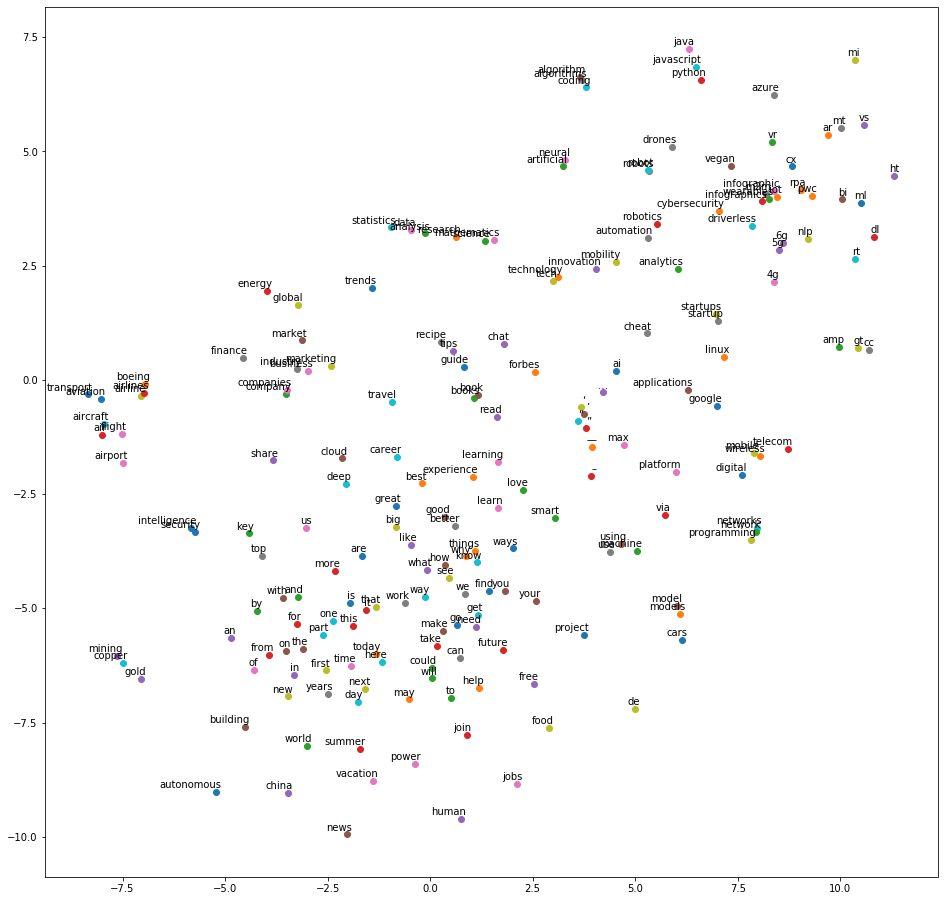

In [920]:
from sklearn.manifold import TSNE
from keras.layers import Embedding,Bidirectional,Dense,Conv1D,Flatten,LSTM,GlobalMaxPooling1D,Dropout
import matplotlib.pyplot as plt
#TSNE algorithm used to visualize word embeddings having huge amount (100) dimensions

def tsne():
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens[:200])
    print(new_values.shape)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16,16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

    
    
    
    
tsne()



In [939]:
embedd_layer = Embedding(len(index_of_words) + 1 , 100 , input_length =150 , weights = [embedding_matrix])

In [945]:
model.save('LSTM_Hashtags_150')

In [947]:
model = Sequential()
model.add(embedd_layer)
model.add(Bidirectional(LSTM(30 , return_sequences = True , dropout = 0.1 , recurrent_dropout = 0.1)))
model.add(GlobalMaxPooling1D())
model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
history = model.fit(X,train_labels, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 156349 samples, validate on 17373 samples
Epoch 1/2
156349/156349 [==============================] - 469s 3ms/step - loss: 0.1580 - accuracy: 0.9608 - val_loss: 0.0060 - val_accuracy: 0.9987
Epoch 2/2
156349/156349 [==============================] - 448s 3ms/step - loss: 0.0106 - accuracy: 0.9974 - val_loss: 9.8167e-04 - val_accuracy: 0.9999


In [954]:
model.save('LSTM_Glove.h5')

In [955]:
import os, re, csv, math, codecs
from tqdm import tqdm
#load embeddings
print('loading word embeddings...')
embeddings_index = {}
f = codecs.open('wiki-news-300d-1M.vec', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

loading word embeddings...


999995it [01:43, 9648.10it/s] 


found 999995 word vectors


In [956]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 150
EMBEDDING_DIM = 300
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(tweets_copy['TweetFulltext1'].values)
X = tokenizer.texts_to_sequences(tweets_copy['TweetFulltext1'].values)
X = sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

In [958]:
index_of_words = tokenizer.word_index
print(len(index_of_words))

45178


In [966]:
#embedding matrix
print('preparing embedding matrix...')
words_not_found = []
nb_words = min(MAX_NB_WORDS, len(index_of_words)+1)
embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
for word, i in index_of_words.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 21550


In [967]:
embedd_layer = Embedding(len(index_of_words) + 1 , 300 , input_length =150 , weights = [embedding_matrix])

In [968]:
model = Sequential()
model.add(embedd_layer)
model.add(Bidirectional(LSTM(30 , return_sequences = True , dropout = 0.1 , recurrent_dropout = 0.1)))
model.add(GlobalMaxPooling1D())
model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
history = model.fit(X,train_labels, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 156349 samples, validate on 17373 samples
Epoch 1/2


 11264/156349 [=>............................] - ETA: 3:51:19 - loss: 2.8070 - accuracy: 0.0000e+0 - ETA: 2:27:45 - loss: 2.7823 - accuracy: 0.0547    - ETA: 1:48:35 - loss: 2.7711 - accuracy: 0.083 - ETA: 1:28:13 - loss: 2.7597 - accuracy: 0.117 - ETA: 1:15:50 - loss: 2.7453 - accuracy: 0.190 - ETA: 1:07:27 - loss: 2.7285 - accuracy: 0.247 - ETA: 1:01:31 - loss: 2.7183 - accuracy: 0.274 - ETA: 57:29 - loss: 2.7029 - accuracy: 0.3164  - ETA: 53:57 - loss: 2.6893 - accuracy: 0.349 - ETA: 51:11 - loss: 2.6774 - accuracy: 0.367 - ETA: 48:48 - loss: 2.6672 - accuracy: 0.373 - ETA: 46:51 - loss: 2.6513 - accuracy: 0.391 - ETA: 45:09 - loss: 2.6346 - accuracy: 0.409 - ETA: 43:53 - loss: 2.6215 - accuracy: 0.420 - ETA: 42:40 - loss: 2.6116 - accuracy: 0.421 - ETA: 41:33 - loss: 2.5937 - accuracy: 0.433 - ETA: 40:37 - loss: 2.5716 - accuracy: 0.448 - ETA: 39:43 - loss: 2.5498 - accuracy: 0.460 - ETA: 38:57 - loss: 2.5300 - accuracy: 0.468 - ETA: 38:16 - loss: 2.5100 - accuracy: 0.474 - ETA: 37

 45440/156349 [=======>......................] - ETA: 21:42 - loss: 0.4547 - accuracy: 0.888 - ETA: 21:41 - loss: 0.4539 - accuracy: 0.888 - ETA: 21:41 - loss: 0.4532 - accuracy: 0.888 - ETA: 21:40 - loss: 0.4524 - accuracy: 0.888 - ETA: 21:40 - loss: 0.4516 - accuracy: 0.889 - ETA: 21:39 - loss: 0.4508 - accuracy: 0.889 - ETA: 21:38 - loss: 0.4502 - accuracy: 0.889 - ETA: 21:38 - loss: 0.4495 - accuracy: 0.889 - ETA: 21:37 - loss: 0.4488 - accuracy: 0.889 - ETA: 21:36 - loss: 0.4480 - accuracy: 0.889 - ETA: 21:35 - loss: 0.4473 - accuracy: 0.890 - ETA: 21:35 - loss: 0.4469 - accuracy: 0.890 - ETA: 21:34 - loss: 0.4463 - accuracy: 0.890 - ETA: 21:34 - loss: 0.4457 - accuracy: 0.890 - ETA: 21:33 - loss: 0.4450 - accuracy: 0.890 - ETA: 21:33 - loss: 0.4444 - accuracy: 0.890 - ETA: 21:32 - loss: 0.4438 - accuracy: 0.891 - ETA: 21:31 - loss: 0.4431 - accuracy: 0.891 - ETA: 21:30 - loss: 0.4423 - accuracy: 0.891 - ETA: 21:29 - loss: 0.4419 - accuracy: 0.891 - ETA: 21:29 - loss: 0.4411 - acc

 56832/156349 [=========>....................] - ETA: 19:38 - loss: 0.3565 - accuracy: 0.912 - ETA: 19:37 - loss: 0.3562 - accuracy: 0.912 - ETA: 19:36 - loss: 0.3558 - accuracy: 0.912 - ETA: 19:36 - loss: 0.3554 - accuracy: 0.912 - ETA: 19:35 - loss: 0.3549 - accuracy: 0.912 - ETA: 19:34 - loss: 0.3544 - accuracy: 0.912 - ETA: 19:33 - loss: 0.3540 - accuracy: 0.912 - ETA: 19:32 - loss: 0.3535 - accuracy: 0.913 - ETA: 19:32 - loss: 0.3531 - accuracy: 0.913 - ETA: 19:31 - loss: 0.3527 - accuracy: 0.913 - ETA: 19:30 - loss: 0.3524 - accuracy: 0.913 - ETA: 19:29 - loss: 0.3519 - accuracy: 0.913 - ETA: 19:28 - loss: 0.3515 - accuracy: 0.913 - ETA: 19:28 - loss: 0.3510 - accuracy: 0.913 - ETA: 19:27 - loss: 0.3507 - accuracy: 0.913 - ETA: 19:26 - loss: 0.3503 - accuracy: 0.913 - ETA: 19:25 - loss: 0.3498 - accuracy: 0.914 - ETA: 19:24 - loss: 0.3495 - accuracy: 0.914 - ETA: 19:24 - loss: 0.3491 - accuracy: 0.914 - ETA: 19:23 - loss: 0.3487 - accuracy: 0.914 - ETA: 19:22 - loss: 0.3482 - acc

 68224/156349 [============>.................] - ETA: 17:22 - loss: 0.2946 - accuracy: 0.927 - ETA: 17:22 - loss: 0.2944 - accuracy: 0.927 - ETA: 17:21 - loss: 0.2941 - accuracy: 0.927 - ETA: 17:21 - loss: 0.2937 - accuracy: 0.927 - ETA: 17:20 - loss: 0.2935 - accuracy: 0.927 - ETA: 17:19 - loss: 0.2932 - accuracy: 0.928 - ETA: 17:18 - loss: 0.2929 - accuracy: 0.928 - ETA: 17:18 - loss: 0.2927 - accuracy: 0.928 - ETA: 17:17 - loss: 0.2924 - accuracy: 0.928 - ETA: 17:16 - loss: 0.2922 - accuracy: 0.928 - ETA: 17:16 - loss: 0.2919 - accuracy: 0.928 - ETA: 17:15 - loss: 0.2916 - accuracy: 0.928 - ETA: 17:14 - loss: 0.2913 - accuracy: 0.928 - ETA: 17:14 - loss: 0.2910 - accuracy: 0.928 - ETA: 17:13 - loss: 0.2908 - accuracy: 0.928 - ETA: 17:12 - loss: 0.2905 - accuracy: 0.928 - ETA: 17:12 - loss: 0.2902 - accuracy: 0.928 - ETA: 17:11 - loss: 0.2899 - accuracy: 0.928 - ETA: 17:10 - loss: 0.2896 - accuracy: 0.928 - ETA: 17:09 - loss: 0.2895 - accuracy: 0.929 - ETA: 17:09 - loss: 0.2892 - acc

 79616/156349 [==============>...............] - ETA: 15:16 - loss: 0.2511 - accuracy: 0.938 - ETA: 15:16 - loss: 0.2509 - accuracy: 0.938 - ETA: 15:15 - loss: 0.2507 - accuracy: 0.938 - ETA: 15:14 - loss: 0.2504 - accuracy: 0.938 - ETA: 15:13 - loss: 0.2502 - accuracy: 0.938 - ETA: 15:13 - loss: 0.2500 - accuracy: 0.938 - ETA: 15:12 - loss: 0.2498 - accuracy: 0.938 - ETA: 15:11 - loss: 0.2496 - accuracy: 0.938 - ETA: 15:10 - loss: 0.2494 - accuracy: 0.938 - ETA: 15:10 - loss: 0.2492 - accuracy: 0.938 - ETA: 15:09 - loss: 0.2489 - accuracy: 0.939 - ETA: 15:08 - loss: 0.2487 - accuracy: 0.939 - ETA: 15:08 - loss: 0.2485 - accuracy: 0.939 - ETA: 15:07 - loss: 0.2483 - accuracy: 0.939 - ETA: 15:06 - loss: 0.2481 - accuracy: 0.939 - ETA: 15:06 - loss: 0.2479 - accuracy: 0.939 - ETA: 15:05 - loss: 0.2477 - accuracy: 0.939 - ETA: 15:04 - loss: 0.2475 - accuracy: 0.939 - ETA: 15:03 - loss: 0.2473 - accuracy: 0.939 - ETA: 15:03 - loss: 0.2471 - accuracy: 0.939 - ETA: 15:02 - loss: 0.2469 - acc

 91008/156349 [================>.............] - ETA: 13:12 - loss: 0.2185 - accuracy: 0.946 - ETA: 13:11 - loss: 0.2184 - accuracy: 0.946 - ETA: 13:11 - loss: 0.2182 - accuracy: 0.946 - ETA: 13:10 - loss: 0.2181 - accuracy: 0.946 - ETA: 13:09 - loss: 0.2179 - accuracy: 0.946 - ETA: 13:09 - loss: 0.2178 - accuracy: 0.946 - ETA: 13:08 - loss: 0.2176 - accuracy: 0.946 - ETA: 13:07 - loss: 0.2175 - accuracy: 0.946 - ETA: 13:06 - loss: 0.2173 - accuracy: 0.946 - ETA: 13:06 - loss: 0.2171 - accuracy: 0.946 - ETA: 13:05 - loss: 0.2170 - accuracy: 0.946 - ETA: 13:04 - loss: 0.2168 - accuracy: 0.947 - ETA: 13:04 - loss: 0.2166 - accuracy: 0.947 - ETA: 13:03 - loss: 0.2165 - accuracy: 0.947 - ETA: 13:02 - loss: 0.2164 - accuracy: 0.947 - ETA: 13:02 - loss: 0.2162 - accuracy: 0.947 - ETA: 13:01 - loss: 0.2161 - accuracy: 0.947 - ETA: 13:00 - loss: 0.2159 - accuracy: 0.947 - ETA: 13:00 - loss: 0.2158 - accuracy: 0.947 - ETA: 12:59 - loss: 0.2156 - accuracy: 0.947 - ETA: 12:58 - loss: 0.2155 - acc

102592/156349 [==================>...........] - ETA: 11:10 - loss: 0.1945 - accuracy: 0.952 - ETA: 11:10 - loss: 0.1944 - accuracy: 0.952 - ETA: 11:09 - loss: 0.1942 - accuracy: 0.952 - ETA: 11:08 - loss: 0.1941 - accuracy: 0.952 - ETA: 11:08 - loss: 0.1940 - accuracy: 0.952 - ETA: 11:07 - loss: 0.1938 - accuracy: 0.952 - ETA: 11:06 - loss: 0.1937 - accuracy: 0.952 - ETA: 11:06 - loss: 0.1936 - accuracy: 0.952 - ETA: 11:05 - loss: 0.1934 - accuracy: 0.952 - ETA: 11:04 - loss: 0.1933 - accuracy: 0.952 - ETA: 11:03 - loss: 0.1932 - accuracy: 0.952 - ETA: 11:03 - loss: 0.1931 - accuracy: 0.953 - ETA: 11:02 - loss: 0.1929 - accuracy: 0.953 - ETA: 11:01 - loss: 0.1928 - accuracy: 0.953 - ETA: 11:01 - loss: 0.1927 - accuracy: 0.953 - ETA: 11:00 - loss: 0.1926 - accuracy: 0.953 - ETA: 10:59 - loss: 0.1924 - accuracy: 0.953 - ETA: 10:59 - loss: 0.1923 - accuracy: 0.953 - ETA: 10:58 - loss: 0.1922 - accuracy: 0.953 - ETA: 10:57 - loss: 0.1921 - accuracy: 0.953 - ETA: 10:57 - loss: 0.1920 - acc

114496/156349 [====================>.........] - ETA: 9:08 - loss: 0.1745 - accuracy: 0.95 - ETA: 9:08 - loss: 0.1744 - accuracy: 0.95 - ETA: 9:07 - loss: 0.1743 - accuracy: 0.95 - ETA: 9:06 - loss: 0.1742 - accuracy: 0.95 - ETA: 9:06 - loss: 0.1741 - accuracy: 0.95 - ETA: 9:05 - loss: 0.1740 - accuracy: 0.95 - ETA: 9:04 - loss: 0.1739 - accuracy: 0.95 - ETA: 9:04 - loss: 0.1738 - accuracy: 0.95 - ETA: 9:03 - loss: 0.1737 - accuracy: 0.95 - ETA: 9:02 - loss: 0.1737 - accuracy: 0.95 - ETA: 9:02 - loss: 0.1736 - accuracy: 0.95 - ETA: 9:01 - loss: 0.1735 - accuracy: 0.95 - ETA: 9:00 - loss: 0.1734 - accuracy: 0.95 - ETA: 9:00 - loss: 0.1733 - accuracy: 0.95 - ETA: 8:59 - loss: 0.1732 - accuracy: 0.95 - ETA: 8:58 - loss: 0.1731 - accuracy: 0.95 - ETA: 8:58 - loss: 0.1730 - accuracy: 0.95 - ETA: 8:57 - loss: 0.1729 - accuracy: 0.95 - ETA: 8:56 - loss: 0.1728 - accuracy: 0.95 - ETA: 8:56 - loss: 0.1728 - accuracy: 0.95 - ETA: 8:55 - loss: 0.1727 - accuracy: 0.95 - ETA: 8:54 - loss: 0.1725 - 

126400/156349 [=======================>......] - ETA: 7:05 - loss: 0.1580 - accuracy: 0.96 - ETA: 7:04 - loss: 0.1579 - accuracy: 0.96 - ETA: 7:03 - loss: 0.1578 - accuracy: 0.96 - ETA: 7:03 - loss: 0.1577 - accuracy: 0.96 - ETA: 7:02 - loss: 0.1576 - accuracy: 0.96 - ETA: 7:02 - loss: 0.1575 - accuracy: 0.96 - ETA: 7:01 - loss: 0.1574 - accuracy: 0.96 - ETA: 7:00 - loss: 0.1574 - accuracy: 0.96 - ETA: 7:00 - loss: 0.1573 - accuracy: 0.96 - ETA: 6:59 - loss: 0.1572 - accuracy: 0.96 - ETA: 6:58 - loss: 0.1571 - accuracy: 0.96 - ETA: 6:58 - loss: 0.1570 - accuracy: 0.96 - ETA: 6:57 - loss: 0.1570 - accuracy: 0.96 - ETA: 6:56 - loss: 0.1569 - accuracy: 0.96 - ETA: 6:56 - loss: 0.1568 - accuracy: 0.96 - ETA: 6:55 - loss: 0.1567 - accuracy: 0.96 - ETA: 6:54 - loss: 0.1566 - accuracy: 0.96 - ETA: 6:54 - loss: 0.1565 - accuracy: 0.96 - ETA: 6:53 - loss: 0.1565 - accuracy: 0.96 - ETA: 6:52 - loss: 0.1564 - accuracy: 0.96 - ETA: 6:52 - loss: 0.1563 - accuracy: 0.96 - ETA: 6:51 - loss: 0.1562 - 

138304/156349 [=========================>....] - ETA: 5:03 - loss: 0.1440 - accuracy: 0.96 - ETA: 5:02 - loss: 0.1439 - accuracy: 0.96 - ETA: 5:01 - loss: 0.1439 - accuracy: 0.96 - ETA: 5:01 - loss: 0.1438 - accuracy: 0.96 - ETA: 5:00 - loss: 0.1437 - accuracy: 0.96 - ETA: 4:59 - loss: 0.1437 - accuracy: 0.96 - ETA: 4:59 - loss: 0.1437 - accuracy: 0.96 - ETA: 4:58 - loss: 0.1436 - accuracy: 0.96 - ETA: 4:57 - loss: 0.1435 - accuracy: 0.96 - ETA: 4:57 - loss: 0.1434 - accuracy: 0.96 - ETA: 4:56 - loss: 0.1434 - accuracy: 0.96 - ETA: 4:55 - loss: 0.1433 - accuracy: 0.96 - ETA: 4:55 - loss: 0.1432 - accuracy: 0.96 - ETA: 4:54 - loss: 0.1432 - accuracy: 0.96 - ETA: 4:53 - loss: 0.1431 - accuracy: 0.96 - ETA: 4:53 - loss: 0.1430 - accuracy: 0.96 - ETA: 4:52 - loss: 0.1430 - accuracy: 0.96 - ETA: 4:51 - loss: 0.1430 - accuracy: 0.96 - ETA: 4:51 - loss: 0.1429 - accuracy: 0.96 - ETA: 4:50 - loss: 0.1428 - accuracy: 0.96 - ETA: 4:50 - loss: 0.1427 - accuracy: 0.96 - ETA: 4:49 - loss: 0.1427 - 

150208/156349 [===========================>..] - ETA: 3:01 - loss: 0.1325 - accuracy: 0.96 - ETA: 3:01 - loss: 0.1325 - accuracy: 0.96 - ETA: 3:00 - loss: 0.1324 - accuracy: 0.96 - ETA: 2:59 - loss: 0.1324 - accuracy: 0.96 - ETA: 2:59 - loss: 0.1323 - accuracy: 0.96 - ETA: 2:58 - loss: 0.1322 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1322 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1321 - accuracy: 0.96 - ETA: 2:56 - loss: 0.1321 - accuracy: 0.96 - ETA: 2:55 - loss: 0.1320 - accuracy: 0.96 - ETA: 2:55 - loss: 0.1320 - accuracy: 0.96 - ETA: 2:54 - loss: 0.1319 - accuracy: 0.96 - ETA: 2:54 - loss: 0.1319 - accuracy: 0.96 - ETA: 2:53 - loss: 0.1318 - accuracy: 0.96 - ETA: 2:52 - loss: 0.1318 - accuracy: 0.96 - ETA: 2:52 - loss: 0.1317 - accuracy: 0.96 - ETA: 2:51 - loss: 0.1316 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1316 - accuracy: 0.96 - ETA: 2:50 - loss: 0.1315 - accuracy: 0.96 - ETA: 2:49 - loss: 0.1315 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1314 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1314 - 

156349/156349 [==============================] - ETA: 1:01 - loss: 0.1227 - accuracy: 0.97 - ETA: 1:00 - loss: 0.1227 - accuracy: 0.97 - ETA: 1:00 - loss: 0.1226 - accuracy: 0.97 - ETA: 59s - loss: 0.1226 - accuracy: 0.9702 - ETA: 58s - loss: 0.1225 - accuracy: 0.970 - ETA: 58s - loss: 0.1225 - accuracy: 0.970 - ETA: 57s - loss: 0.1224 - accuracy: 0.970 - ETA: 56s - loss: 0.1224 - accuracy: 0.970 - ETA: 56s - loss: 0.1223 - accuracy: 0.970 - ETA: 55s - loss: 0.1223 - accuracy: 0.970 - ETA: 54s - loss: 0.1222 - accuracy: 0.970 - ETA: 54s - loss: 0.1222 - accuracy: 0.970 - ETA: 53s - loss: 0.1221 - accuracy: 0.970 - ETA: 52s - loss: 0.1221 - accuracy: 0.970 - ETA: 52s - loss: 0.1220 - accuracy: 0.970 - ETA: 51s - loss: 0.1220 - accuracy: 0.970 - ETA: 50s - loss: 0.1219 - accuracy: 0.970 - ETA: 50s - loss: 0.1219 - accuracy: 0.970 - ETA: 49s - loss: 0.1218 - accuracy: 0.970 - ETA: 49s - loss: 0.1218 - accuracy: 0.970 - ETA: 48s - loss: 0.1217 - accuracy: 0.970 - ETA: 47s - loss: 0.1217 - 

 11392/156349 [=>............................] - ETA: 26:11 - loss: 0.0029 - accuracy: 1.000 - ETA: 25:45 - loss: 0.0017 - accuracy: 1.000 - ETA: 25:36 - loss: 0.0013 - accuracy: 1.000 - ETA: 25:28 - loss: 0.0015 - accuracy: 1.000 - ETA: 25:33 - loss: 0.0022 - accuracy: 1.000 - ETA: 25:26 - loss: 0.0018 - accuracy: 1.000 - ETA: 25:24 - loss: 0.0040 - accuracy: 0.997 - ETA: 25:20 - loss: 0.0035 - accuracy: 0.998 - ETA: 25:19 - loss: 0.0032 - accuracy: 0.998 - ETA: 25:16 - loss: 0.0030 - accuracy: 0.998 - ETA: 25:17 - loss: 0.0048 - accuracy: 0.997 - ETA: 25:15 - loss: 0.0046 - accuracy: 0.997 - ETA: 25:16 - loss: 0.0044 - accuracy: 0.997 - ETA: 25:15 - loss: 0.0041 - accuracy: 0.997 - ETA: 25:15 - loss: 0.0038 - accuracy: 0.997 - ETA: 25:14 - loss: 0.0042 - accuracy: 0.998 - ETA: 25:12 - loss: 0.0040 - accuracy: 0.998 - ETA: 25:12 - loss: 0.0042 - accuracy: 0.998 - ETA: 25:12 - loss: 0.0042 - accuracy: 0.998 - ETA: 25:11 - loss: 0.0040 - accuracy: 0.998 - ETA: 25:11 - loss: 0.0039 - acc

 45568/156349 [=======>......................] - ETA: 20:02 - loss: 0.0047 - accuracy: 0.999 - ETA: 20:01 - loss: 0.0047 - accuracy: 0.999 - ETA: 20:00 - loss: 0.0047 - accuracy: 0.999 - ETA: 20:00 - loss: 0.0047 - accuracy: 0.999 - ETA: 19:59 - loss: 0.0047 - accuracy: 0.999 - ETA: 19:58 - loss: 0.0047 - accuracy: 0.999 - ETA: 19:58 - loss: 0.0047 - accuracy: 0.999 - ETA: 19:57 - loss: 0.0047 - accuracy: 0.999 - ETA: 19:56 - loss: 0.0047 - accuracy: 0.999 - ETA: 19:56 - loss: 0.0047 - accuracy: 0.999 - ETA: 19:55 - loss: 0.0047 - accuracy: 0.999 - ETA: 19:54 - loss: 0.0047 - accuracy: 0.999 - ETA: 19:54 - loss: 0.0047 - accuracy: 0.999 - ETA: 19:53 - loss: 0.0047 - accuracy: 0.999 - ETA: 19:53 - loss: 0.0047 - accuracy: 0.999 - ETA: 19:52 - loss: 0.0047 - accuracy: 0.999 - ETA: 19:51 - loss: 0.0047 - accuracy: 0.999 - ETA: 19:51 - loss: 0.0047 - accuracy: 0.999 - ETA: 19:50 - loss: 0.0047 - accuracy: 0.999 - ETA: 19:49 - loss: 0.0047 - accuracy: 0.999 - ETA: 19:49 - loss: 0.0047 - acc

 56960/156349 [=========>....................] - ETA: 18:10 - loss: 0.0043 - accuracy: 0.999 - ETA: 18:09 - loss: 0.0043 - accuracy: 0.999 - ETA: 18:08 - loss: 0.0043 - accuracy: 0.999 - ETA: 18:08 - loss: 0.0043 - accuracy: 0.999 - ETA: 18:07 - loss: 0.0043 - accuracy: 0.999 - ETA: 18:07 - loss: 0.0043 - accuracy: 0.999 - ETA: 18:06 - loss: 0.0043 - accuracy: 0.999 - ETA: 18:05 - loss: 0.0043 - accuracy: 0.999 - ETA: 18:05 - loss: 0.0043 - accuracy: 0.999 - ETA: 18:04 - loss: 0.0043 - accuracy: 0.999 - ETA: 18:03 - loss: 0.0043 - accuracy: 0.999 - ETA: 18:03 - loss: 0.0043 - accuracy: 0.999 - ETA: 18:02 - loss: 0.0043 - accuracy: 0.999 - ETA: 18:02 - loss: 0.0043 - accuracy: 0.999 - ETA: 18:01 - loss: 0.0043 - accuracy: 0.999 - ETA: 18:00 - loss: 0.0043 - accuracy: 0.999 - ETA: 18:00 - loss: 0.0043 - accuracy: 0.999 - ETA: 17:59 - loss: 0.0043 - accuracy: 0.999 - ETA: 17:59 - loss: 0.0043 - accuracy: 0.999 - ETA: 17:58 - loss: 0.0043 - accuracy: 0.999 - ETA: 17:57 - loss: 0.0043 - acc

 68352/156349 [============>.................] - ETA: 16:22 - loss: 0.0041 - accuracy: 0.999 - ETA: 16:21 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:21 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:20 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:19 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:19 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:18 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:18 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:17 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:16 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:16 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:15 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:14 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:14 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:13 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:13 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:12 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:11 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:11 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:10 - loss: 0.0040 - accuracy: 0.999 - ETA: 16:09 - loss: 0.0040 - acc

 79744/156349 [==============>...............] - ETA: 14:31 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:31 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:30 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:29 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:29 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:28 - loss: 0.0040 - accuracy: 0.999 - ETA: 14:28 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:27 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:26 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:26 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:25 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:25 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:24 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:23 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:23 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:22 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:22 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:21 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:20 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:20 - loss: 0.0039 - accuracy: 0.999 - ETA: 14:19 - loss: 0.0039 - acc

 91136/156349 [================>.............] - ETA: 12:40 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:39 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:39 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:38 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:37 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:37 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:36 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:36 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:35 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:34 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:34 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:33 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:32 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:32 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:31 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:31 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:30 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:29 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:29 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:28 - loss: 0.0040 - accuracy: 0.999 - ETA: 12:27 - loss: 0.0040 - acc

102784/156349 [==================>...........] - ETA: 10:48 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:47 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:46 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:46 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:45 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:45 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:44 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:43 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:43 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:42 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:41 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:41 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:40 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:39 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:39 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:38 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:38 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:37 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:36 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:36 - loss: 0.0040 - accuracy: 0.999 - ETA: 10:35 - loss: 0.0040 - acc

114688/156349 [=====================>........] - ETA: 8:53 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:52 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:52 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:51 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:50 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:50 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:49 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:49 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:48 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:47 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:47 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:46 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:45 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:45 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:44 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:43 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:43 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:42 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:42 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:41 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:40 - loss: 0.0040 - accuracy: 0.99 - ETA: 8:40 - loss: 0.0039 - 

126592/156349 [=======================>......] - ETA: 6:55 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:54 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:54 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:53 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:52 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:52 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:51 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:51 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:50 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:49 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:49 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:48 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:47 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:47 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:46 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:45 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:45 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:44 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:44 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:43 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:42 - loss: 0.0040 - accuracy: 0.99 - ETA: 6:42 - loss: 0.0040 - 

138496/156349 [=========================>....] - ETA: 4:57 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:56 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:54 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:49 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:48 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:48 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:47 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:46 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:46 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:45 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:44 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:44 - loss: 0.0038 - accuracy: 0.99 - ETA: 4:43 - loss: 0.0038 - 

150400/156349 [===========================>..] - ETA: 2:58 - loss: 0.0038 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0038 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:51 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:51 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:50 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0037 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0037 - 

156349/156349 [==============================] - ETA: 59s - loss: 0.0036 - accuracy: 0.999 - ETA: 58s - loss: 0.0036 - accuracy: 0.999 - ETA: 57s - loss: 0.0036 - accuracy: 0.999 - ETA: 57s - loss: 0.0036 - accuracy: 0.999 - ETA: 56s - loss: 0.0036 - accuracy: 0.999 - ETA: 55s - loss: 0.0036 - accuracy: 0.999 - ETA: 55s - loss: 0.0036 - accuracy: 0.999 - ETA: 54s - loss: 0.0036 - accuracy: 0.999 - ETA: 53s - loss: 0.0036 - accuracy: 0.999 - ETA: 53s - loss: 0.0036 - accuracy: 0.999 - ETA: 52s - loss: 0.0036 - accuracy: 0.999 - ETA: 51s - loss: 0.0036 - accuracy: 0.999 - ETA: 51s - loss: 0.0036 - accuracy: 0.999 - ETA: 50s - loss: 0.0036 - accuracy: 0.999 - ETA: 50s - loss: 0.0036 - accuracy: 0.999 - ETA: 49s - loss: 0.0036 - accuracy: 0.999 - ETA: 48s - loss: 0.0036 - accuracy: 0.999 - ETA: 48s - loss: 0.0036 - accuracy: 0.999 - ETA: 47s - loss: 0.0036 - accuracy: 0.999 - ETA: 46s - loss: 0.0036 - accuracy: 0.999 - ETA: 46s - loss: 0.0036 - accuracy: 0.999 - ETA: 45s - loss: 0.0036 - a

In [972]:
model.save('LSTM_Fasttext.h5')

# Sentence Clustering

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [70]:
import glob
import os
import pandas as pd

output = pd.DataFrame()
for file in glob.glob(r"C:/Users/kasandeep/Desktop/Projects/Twitter_Sector_Classification/TweetDump_last6months/New folder/"+"\\*.xlsx"):
    cn = pd.read_excel(file)
    output = output.append(cn)
output.to_csv(r"C:/Users/kasandeep/Desktop/Projects/Twitter_Sector_Classification/TweetDump_last6months/New folder/"+"\\outPut.csv", index = False, na_rep = "NA", header=None)
print("Completed +::" )

Completed +::


In [73]:
df=pd.read_csv(r"C:/Users/kasandeep/Desktop/Projects/Twitter_Sector_Classification/TweetDump_last6months/New folder/"+"\\outPut.csv")

In [ ]:
# import numpy as np
# import pandas as pd
# import glob
# all_data = pd.DataFrame()
# for f in glob.glob(r"C:/Users/kasandeep/Desktop/Projects/Twitter_Sector_Classification/TweetDump_last6months/New folder/*.xlsx"):
#     df = pd.read_excel(f)
#     all_data = all_data.append(df,ignore_index=True)

# # now save the data frame
# writer = pd.ExcelWriter(r'C:/Users/kasandeep/Desktop/Projects/Twitter_Sector_Classification/TweetDump_last6months/New folder/all_months.xlsx')
# all_data.to_excel(writer,'sheet1')
# writer.save()  

In [ ]:
# df=pd.concat(pd.read_excel(r'C:/Users/kasandeep/Desktop/Projects/Twitter_Sector_Classification/TweetDump_last6months/all_months.xlsx'))

In [35]:
# df = pd.concat(pd.read_excel(r'C:/Users/kasandeep/Desktop/Projects/Twitter_Sector_Classification/TweetDump_last6months/New folder/all_months.xlsx', sheet_name=None), ignore_index=True)

In [74]:
df_copy=df

In [75]:
df.shape

(2595604, 8)

In [77]:
df[1:3]

,3200001,GrahameLucas,#ChangeUK becomes political party for European elections https://t.co/Jptr7UcHtU,NA,NA.1,NA.2,NA.3,160188857
1,3200003,CostaSamaras,RT @jaspar: All of the art works and relics ha...,NaN,NaN,NaN,NaN,159960658
2,3200004,marcuschown,"In many ways, the AfD is a step up from Rees M...",NaN,NaN,NaN,NaN,160515935


In [78]:
df.columns=['id','screenname','TweetFulltext','1','2','3','4','5']

In [137]:
df=df[df['TweetFulltext1'].str.len()>80]

In [138]:
df_copy2=df

In [82]:
df=df.drop(['screenname','1','2','3','4','5'],axis=1)

In [48]:
df=df.drop(['Unnamed: 0'],axis=1)

In [83]:
df = df.drop_duplicates('TweetFulltext')

In [139]:
df.shape

(1363597, 3)

In [96]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

def tweet_cleaner_for_sentiments(text):
    pat1 = r'@[A-Za-z0-9]+'  # these don't contribute to sentiments
    pat2 = r'https?://[A-Za-z0-9./]+'
    combined_pat = r'|'.join((pat1, pat2))
    soup = BeautifulSoup(text, 'html5lib')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    clean_more = re.sub('[^\w\s]','', clean)
    letters_only = re.sub("[^a-zA-Z]", " ", clean_more)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [110]:
tweet_cleaner_for_sentiments("Biden May Be The 'Perfect Person' to Enact A True Green Deal, But He Needs A Better Climate Plan https://t.co/CxyOzyxQRb")

'biden may be the perfect person to enact a true green deal but he needs a better climate plan'

In [125]:
from langdetect import detect
lang=detect('RT @Mu6and: هههههههههههههههههههههههههههه كأن م...')

In [129]:
from textblob import TextBlob
b = TextBlob('RT @Mu6and: هههههههههههههههههههههههههههه كأن م...')
b.detect_language()

'ar'

In [121]:
import spacy
from spacy_langdetect import LanguageDetector
from spacy.lang.en import English
#nlp = spacy.load('en_core_web_sm')
#nlp = spacy.load('en')
nlp = spacy.load("en")
#nlp=spacy.load('en_core_web_sm')
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)
text = 'RT @Mu6and: هههههههههههههههههههههههههههه كأن م...'
doc = nlp(text)
# document level language detection. Think of it like average language of the document!
print(doc._.language)
# sentence level language detection
for sent in doc.sents:
    print(sent, sent._.language)

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [107]:
df['TweetFulltext'].loc[2399948]

"Biden May Be The 'Perfect Person' to Enact A True Green Deal, But He Needs A Better Climate Plan https://t.co/CxyOzyxQRb"

In [130]:
from twitter_pre import TwitterPreprocessor
from textblob import TextBlob
text=[]
for sentence in df['TweetFulltext']:
    b = TextBlob(sentence)
    text.append(b.detect_language())
df['detection']=text

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [131]:
from twitter_pre import TwitterPreprocessor
text=[]
for sentence in df['TweetFulltext']:
#     p = TwitterPreprocessor(sentence)
#     #p.fully_preprocess()
#     p.remove_mentions().remove_urls().remove_punctuation().remove_mentions().remove_twitter_reserved_words().remove_single_letter_words().remove_blank_spaces().remove_stopwords().remove_numbers()
#     #p.remove_punctuation().remove_urls().remove_mentions().remove_twitter_reserved_words().remove_single_letter_words().remove_blank_spaces().remove_stopwords().remove_numbers()
#     text.append(p.text)
    text.append(tweet_cleaner_for_sentiments(sentence))
df['TweetFulltext1']=text

C:\Users\kasandeep\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\__init__.py:335: UserWarning: "https://t.co/WbsYRFewlc

https://t.co/OHzn0lAQcH

https://t.co/iH6V5Xjbnb

https://t.co/x5MZYkYJi5" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\kasandeep\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\__init__.py:335: UserWarning: "https://t.co/NlRq49Kgs4„hitzewelle-für-die-geschichtsbücher“-deutschland-bereitet-sich-auf-die-zweite-gefährliche-hitze-vor/ar-AAEJF7e" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [186]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [lemmatizer.lemmatize(stemmer.stem(word)) for word in tokenizer.tokenize(text.lower())]

In [187]:
from sklearn.feature_extraction import text
#stop_words = text.ENGLISH_STOP_WORDS.union(punc)
#stop_words = text.ENGLISH_STOP_WORDS
desc = df['CleanText'].values
vectorizer = TfidfVectorizer(stop_words = stop_words,tokenizer=tokenize,ngram_range=(1,2))
X = vectorizer.fit_transform(desc)

C:\Users\kasandeep\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'eighti', 'fifti', 'fourti', 'futur', 'ha', 'hundr', 'ninti', 'onc', 'onli', 'ourselv', 'peopl', 'seventi', "should'v", 'sixti', 'themselv', 'thirti', 'twenti', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [188]:
vectorizer.get_stop_words()

frozenset({'...',
           'a',
           'about',
           'above',
           'after',
           'again',
           'against',
           'ain',
           'all',
           'am',
           'amp',
           'an',
           'and',
           'any',
           'are',
           'aren',
           "aren't",
           'as',
           'at',
           'be',
           'because',
           'been',
           'before',
           'being',
           'below',
           'between',
           'billion',
           'billions',
           'both',
           'but',
           'by',
           'can',
           'could',
           'couldn',
           "couldn't",
           'd',
           'did',
           'didn',
           "didn't",
           'do',
           'does',
           'doesn',
           "doesn't",
           'doing',
           'don',
           "don't",
           'down',
           'during',
           'each',
           'eight',
           'eighth',
           'eigh

In [189]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5200])

9302389
['aaronskalb furrier', 'aaronskalb session', 'aaronskalb sit', 'aaronsklar', 'aaronsklar head', 'aaronsklar mccarthychri', 'aaronsojourn', 'aaronsojourn let', 'aaronsojourn realdonaldtrump', 'aaronson', 'aaronson surpris', 'aaronson wascher', 'aaronsonbrenden', 'aaronsonbrenden score', 'aaronsonbrenden take', 'aaronsonsusan', 'aaronsonsusan wa', 'aaronstein', 'aaronstein dovsfriedman', 'aaronstein jack', 'aaronstein manbij', 'aaronstein replac', 'aaronstein turkey', 'aaronstein u', 'aaronstein wrote', 'aaronstigil', 'aaronstigil go', 'aaronstrout', 'aaronstrout ig', 'aaronsuplizio', 'aaronsuplizio wolfejosh', 'aaronsuttl', 'aaronsuttl believ', 'aaronsw', 'aaronsw cloudcomput', 'aaronsw eyebal', 'aaronsw linux', 'aaronsw reddit', 'aaronswartz', 'aaronswartz opensourcecommun', 'aaronswartz pdftribut', 'aaronswartz threaten', 'aaronswartzday', 'aaronswartzday complet', 'aaronswartzday day', 'aaronswartzday dweb', 'aarontask', 'aarontask kid', 'aarontheplann', 'aarontheplann realli

In [182]:
word_features

['aa',
 'aa aa',
 'aa aaaa',
 'aa abandon',
 'aa abeill',
 'aa act',
 'aa actor',
 'aa advert',
 'aa agre',
 'aa aircraft',
 'aa alexand',
 'aa alhamdulillah',
 'aa allow',
 'aa alreadi',
 'aa amateur',
 'aa ammunit',
 'aa analyt',
 'aa ansari',
 'aa anti',
 'aa app',
 'aa arab',
 'aa articl',
 'aa attitud',
 'aa award',
 'aa awkward',
 'aa b',
 'aa ball',
 'aa barcelona',
 'aa barobertson',
 'aa basalt',
 'aa batteri',
 'aa bekalombardo',
 'aa benefit',
 'aa better',
 'aa bhael',
 'aa bi',
 'aa biometr',
 'aa bipolarstyl',
 'aa blame',
 'aa bmz',
 'aa captain',
 'aa capx',
 'aa cardiologist',
 'aa carmack',
 'aa carttca',
 'aa cataluna',
 'aa catch',
 'aa cattl',
 'aa cb',
 'aa chanc',
 'aa check',
 'aa chip',
 'aa choic',
 'aa cieslak',
 'aa code',
 'aa colour',
 'aa command',
 'aa complic',
 'aa consumpt',
 'aa content',
 'aa continu',
 'aa core',
 'aa crypto',
 'aa cumin',
 'aa db',
 'aa decis',
 'aa degre',
 'aa delay',
 'aa delta',
 'aa deserv',
 'aa di',
 'aa diagnosi',
 'aa dis

In [152]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

585754
['acuerdoporelemprendimiento', 'acuerdospol', 'acuerdosporelempredimiento', 'acuerdosporelemprendimiento', 'acuest', 'acuesta', 'acuf', 'acuff', 'acuicultor', 'acuicultura', 'acuiti', 'acuityrisk', 'acuk', 'aculief', 'acum', 'acuma', 'acumar', 'acumatica', 'acumaticasummit', 'acumen', 'acumenfellow', 'acumenglobalpartn', 'acumenproud', 'acuminatum', 'acumo', 'acumsocialist', 'acumul', 'acumula', 'acumulaci', 'acumulada', 'acumulado', 'acumulador', 'acumuladora', 'acumulam', 'acumulan', 'acumulando', 'acumular', 'acumularan', 'acumulativo', 'acumulen', 'acuna', 'acunavillaorduna', 'acundo', 'acup', 'acupoint', 'acupointtuina', 'acupotomi', 'acupressur', 'acupunctur', 'acupunctureinfus', 'acupuncturework', 'acupuncturist', 'acur', 'acura', 'acuraci', 'acuransx', 'acurasi', 'acurasysheavi', 'acurio', 'acuriousplac', 'acus', 'acusa', 'acusaci', 'acusacion', 'acusada', 'acusado', 'acusador', 'acusam', 'acusan', 'acusando', 'acusar', 'acusaram', 'acusarl', 'acusarlo', 'acusarno', 'acu

In [3]:
import gc
import re
import nltk
import string
import unicodedata
import numpy as np
import pandas as pd

from nltk.util import ngrams
#from nltk.twitter import Twitter
from nltk import SnowballStemmer
from nltk.corpus import stopwords 
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [174]:
stop_words

['themselves',
 'from',
 'until',
 'both',
 'now',
 'eight',
 'people',
 'twenty',
 'could',
 "isn't",
 'had',
 'aren',
 'first',
 'mightn',
 'its',
 "doesn't",
 'just',
 'such',
 'my',
 'that',
 'need',
 'tenth',
 'who',
 'yours',
 'ma',
 'again',
 'mustn',
 'via',
 "won't",
 'future',
 'hadn',
 'more',
 'further',
 'because',
 'was',
 'needn',
 'seven',
 'will',
 "wouldn't",
 'here',
 'how',
 'be',
 'billion',
 'today',
 'your',
 'these',
 'before',
 'ourselves',
 'theirs',
 'through',
 'than',
 'them',
 'all',
 'for',
 "you'd",
 'himself',
 "she's",
 'her',
 'haven',
 "mustn't",
 "should've",
 'does',
 'no',
 'were',
 'above',
 've',
 'after',
 'thousands',
 's',
 'ten',
 "weren't",
 "wasn't",
 'under',
 'one',
 'wasn',
 'a',
 'trillions',
 "you're",
 'nine',
 'yourselves',
 'off',
 'million',
 'below',
 '...',
 "mightn't",
 'we',
 'should',
 'as',
 'of',
 'has',
 'doesn',
 'shan',
 "that'll",
 'in',
 'two',
 'shouldn',
 "it's",
 'see',
 "you've",
 'this',
 'doing',
 'fourty',
 'dow

In [4]:
import nltk
"""Data and Helper Functions"""
freqdist = nltk.FreqDist()

# nltk.download('wordnet')
# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

new_words = ["one", "two", "three", "four", "five", "six", "seven","eight","nine", "zero", 
             "ten", "twenty", "thirty", "fourty", "fifty", "sixty", "seventy", "eighty", "ninty", 
             "first", "second", "third", "fourth", "fifth", "sixth", "seventh", "eighth", "ninth", "tenth",
             "hundred", "thousand", "million", "billion", "trillion", 
             "hundreds", "thousands", "millions", "billions", "trillions",
             "world", "today", "would", "could", "future", "people", 
             '...', 'via', 'see', 'new', 'end', 'amp', 
             'like', 'time', 'need', 'know', 'ever']
stop_words = list(stop_words.union(new_words))

stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

tweet_tokenizer = TweetTokenizer(preserve_case=True, strip_handles=True, reduce_len=True)

# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)


emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)



In [5]:
"""Helper Functions"""
def get_links(tweet):
    reg_ex = r'((?:(?:https?|ftp|file):\/\/|www\.|ftp\.)*(?:[-a-zA-Z0-9@:%_\+~.#=]{2,256})?([-a-zA-Z0-9@:%_\+~#=]*)\.[a-z]{2,6}\b(?:[-a-zA-Z0-9@:%_\+.~#?&\/\/=]*)*)'
    link_regex = re.compile(reg_ex, re.DOTALL)
    links = re.findall(link_regex, tweet)
    link_list = []
    for link in links:
        link_list.append(link[0])    
    return link_list

def get_tickers(tweet):
    ticker_regex = re.compile(r'\$\w*', re.DOTALL)
    tickers = re.findall(ticker_regex, tweet)
    ticker_list = []
    for ticker in tickers:
        ticker_list.append(ticker[0])    
    return ticker_list

def get_special(tweet, special_prefixes=['@', '#']):
    words_list = []
    for word in tweet.split():
        word = word.strip()
        if word:
            if word[0] in special_prefixes:
                words_list.append(word)
    return words_list

def strip_links(tweet):
    # reg_ex = r'((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)'
    # ((\b)?((https|https|ftp|file):\/\/)|(www\.|ftp\.))?((?:[-a-zA-Z0-9@:%_\+~.#=]{2,256}\.)?([-a-zA-Z0-9@:%_\+~#=]*)\.[a-z]{2,6}\b(?:[-a-zA-Z0-9@:%_\+.~#?&\/\/=]*))*(\b)?
    reg_ex = r'((?:(?:https?|ftp|file):\/\/|www\.|ftp\.)*(?:[-a-zA-Z0-9@:%_\+~.#=]{2,256})?([-a-zA-Z0-9@:%_\+~#=]*)\.[a-z]{2,6}\b(?:[-a-zA-Z0-9@:%_\+.~#?&\/\/=]*)*)'
    tweet = re.sub(reg_ex, ' ', tweet)
    # link_regex = re.compile(reg_ex, re.DOTALL)
    # links = re.findall(link_regex, tweet)
    # print (links)
    # for link in links:
    #     tweet = tweet.replace(link[0], ' ')    
    return tweet


def strip_special(tweet, special_prefixes=['@', '#']):
    for separator in string.punctuation:
        if separator not in special_prefixes:
            tweet = tweet.replace(separator,' ')
    words_list = []
    for word in tweet.split():
        word = word.strip()
        if word:
            if word[0] not in special_prefixes:
                words_list.append(word)
    return ' '.join(words_list)


def clean_tweets(tweet, keep_list=[]):
    tweet = re.sub(r"(Dr\.)", "Doctor ", tweet)
    tweet = re.sub(r'^RT[\s]+', ' ', tweet) # remove old style retweet text "RT"
    
    if '$' not in keep_list:
        tweet = re.sub(r'\$\w*', ' ', tweet)     # remove stock market tickers like $GE
    
    tweet = re.sub(r'(?:\.?)([\w\-_+#~!$&\'\.]+(?<!\.)(@|[ ]?\(?[ ]?(at|AT)[ ]?\)?[ ]?)\
                   (?<!\.)[\w]+[\w\-\.]*\.[a-zA-Z-]{2,3})(?:[^\w])', ' ', tweet) # remove emails
    tweet = strip_links(tweet) # remove links
    
    if '@' not in keep_list:
        tweet = re.sub(r'\@[\w.]*', ' ', tweet) #remove mentions
    
    if '#' not in keep_list:
        tweet = re.sub(r'\#[\w.]*', ' ', tweet) # remove # from the hashtags
        # tweet = re.sub(r'#', '', tweet)

    tweet = re.sub(r'([\d]+)([\.]{1}[\d]*)*', ' ', tweet) # remove numbers
    tweet = re.sub(r'([\d]+)([\/]{1}[\d]+)', ' ', tweet) # remove fractions
    tweet = re.sub(r'([\d+])', ' ', tweet) # remove integers
    
    tweet = tweet.lower()
    tweet = re.sub(r"what’s", "what is ", tweet)
    tweet = re.sub(r"\'s", " ", tweet)
    tweet = re.sub(r"\'ve", " have ", tweet)
    tweet = re.sub(r"can't", "can not ", tweet)
    tweet = re.sub(r"n't", " not ", tweet)
    tweet = re.sub(r"i'm", "i am ", tweet)
    tweet = re.sub(r"\'re", " are ", tweet)
    tweet = re.sub(r"\'d", " would ", tweet)
    tweet = re.sub(r"\'ll", " will ", tweet)
    tweet = re.sub(r"\'scuse", " excuse ", tweet)
    tweet = re.sub("\W", " ", tweet) # remove single char words
    tweet = re.sub("\s+", " ", tweet) # remove continuous spaces
    tweet = tweet.strip(" ")
    tweet = unicodedata.normalize('NFKD', tweet).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # symbol left after removing mentions, hashtags, links, emails, etc.
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'/', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
    #remove emojis from tweet
    tweet = emoji_pattern.sub(r'', tweet)
    tweet = re.sub(r'_',' ', tweet)
    tweet = tweet.strip(" ")
    tweet = ' '.join([x for x in tweet.split()])
    
    return tweet


def process_tweets(tweet, lemma_stem=True):
    tweet = re.sub(r'\#', '', tweet)
    
    tweet = [x for x in tweet.split() if len(x)>1]
    tweet = [x for x in tweet if x not in stop_words]
    tweet = [x for x in tweet if x not in emoticons]
    tweet = [x for x in tweet if x not in string.punctuation]

    tweet = ' '.join(tweet)
    
    # tokenize tweets
    tweet_tokens = tweet_tokenizer.tokenize(tweet)

    bigrams = nltk.bigrams(tweet_tokens)
    bigrams = ['_'.join(x) for x in bigrams]

    tweet_tokens = list(tweet_tokens+bigrams)
    
    tweets_clean = []    
    for word in tweet_tokens:
        if lemma_stem:
            lemmatize_word = lemmatizer.lemmatize(word)
            stem_word = stemmer.stem(lemmatize_word) # stemming word
            freqdist[stem_word]+=1
            tweets_clean.append(stem_word)
        else:
            freqdist[word]+=1
            tweets_clean.append(word)

    return tweets_clean

In [80]:
df = pd.concat(pd.read_excel(r'C:/Users/kasandeep/Desktop/Projects/Twitter_Sector_Classification/TweetDump_last6months/TweetsDump_Aug.xlsx', sheet_name=None), ignore_index=True)

In [ ]:
# import dask
# import dask.dataframe as dd
# from dask.delayed import delayed
# fn=r'C:/Users/kasandeep/Desktop/Projects/Twitter_Sector_Classification/TweetDump_last6months/TweetsDump_AUG.xlsx'
# parts = [dask.delayed(pd.read_excel)(fn, i, **other_options) 
#          for i in range(number_of_sheets)]
# df = dd.from_delayed(parts, meta=parts[0].compute())

In [81]:
df=df.drop(['Companies','Sectors','Locations','ScreenName','Themes','Tweethistoryid','id'],axis=1)

In [82]:
df['CleanText'] = df['TweetFulltext'].apply(lambda x: clean_tweets(str(x), keep_list=['#', '@', '$']))

In [83]:
df=df[df['CleanText'].str.len()>80]

In [84]:
df.shape

(1992651, 2)

In [85]:
df_copy=df

In [86]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [lemmatizer.lemmatize(stemmer.stem(word)) for word in tokenizer.tokenize(text.lower())]

In [87]:
from sklearn.feature_extraction import text
#stop_words = text.ENGLISH_STOP_WORDS.union(punc)
#stop_words = text.ENGLISH_STOP_WORDS
desc = df['CleanText'].values
vectorizer = TfidfVectorizer(stop_words = stop_words,tokenizer=tokenize, max_features=500,min_df=80)
X = vectorizer.fit_transform(desc)

In [88]:
X.shape

(1992651, 500)

In [89]:
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = -1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X)
# We look at 3 the clusters generated by k-means.


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=20, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
words=vectorizer.get_feature_names()
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : de, la, en, que, el, le, e, un, los, l, et, para, con, del, est, se, al, c, n, ha, http, die, h, ai, part
1 : wa, year, last, day, trump, say, said, ha, think, u, ago, onli, go, work, becaus, use, thought, report, great, look, back, thank, good, even, befor
2 : ha, u, thank, make, year, use, look, work, ai, day, great, go, say, take, good, think, whi, help, read, come, love, want, way, learn, trump
3 : get, climat, chang, go, u, work, ha, want, make, help, back, year, way, take, let, day, start, use, climatechang, say, right, whi, think, thing, look
4 : peopl, think, make, mani, say, get, work, want, ha, live, use, becaus, thing, whi, wa, go, help, u, good, year, right, vote, onli, way, great


In [90]:
df['cluster_label']=kmeans.labels_

In [175]:
df_copy4=df

In [91]:
df['dump']='E'

In [32]:
df['cluster_label'].value_counts()

2    1266207
3      95445
1      87483
4      70700
0      57573
Name: cluster_label, dtype: int64

In [92]:
df3=pd.concat([df[df['cluster_label']==0].sample(1000),df[df['cluster_label']==1].sample(1000),df[df['cluster_label']==2].sample(1000),df[df['cluster_label']==3].sample(1000),df[df['cluster_label']==4].sample(1000)],axis=0,ignore_index=True)

In [36]:
df3.tail()

,TweetFulltext,CleanText,cluster_label,dump
4995,Did Jacob Rees-Mogg explicitly state that we s...,did jacob rees mogg explicitly state that we s...,4,A
4996,I can't tell how many #MAGA people on here wis...,i can not tell how many maga people on here wi...,4,A
4997,10 ways Google Assistant can make people’s liv...,ways google assistant can make people s lives ...,4,A
4998,Surround yourself with people who elevate you....,surround yourself with people who elevate you ...,4,A
4999,BREAKING: We and partners have issued a travel...,breaking we and partners have issued a travel ...,4,A


In [93]:
df3.to_csv('Aug.csv')

In [105]:
pd.concat(map(pd.read_csv, [r"C:\Users\kasandeep\Desktop\Projects\Twitter_Sector_Classification\csv\Apr.csv", r"C:\Users\kasandeep\Desktop\Projects\Twitter_Sector_Classification\csv\May.csv",r"C:\Users\kasandeep\Desktop\Projects\Twitter_Sector_Classification\csv\June.csv",r"C:\Users\kasandeep\Desktop\Projects\Twitter_Sector_Classification\csv\July.csv",r"C:\Users\kasandeep\Desktop\Projects\Twitter_Sector_Classification\csv\Aug.csv"])).to_csv('Final_sheets_clustered.csv')

In [157]:
# stemmer = SnowballStemmer('english')
# tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

# def tokenize(text):
#     return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [150]:
# vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
# X2 = vectorizer2.fit_transform(desc)
# word_features2 = vectorizer2.get_feature_names()
# print(len(word_features2))
# print(word_features2[:50]) 

In [145]:
# vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
# X3 = vectorizer3.fit_transform(desc)
# words = vectorizer3.get_feature_names()

In [155]:
from collections import Counter
Counter(word_features)

Counter({'aa': 1,
         'aaa': 1,
         'aaaa': 1,
         'aaaaa': 1,
         'aaaaaa': 1,
         'aaaaaaa': 1,
         'aaaaaaaaa': 1,
         'aaaaaaaaaaa': 1,
         'aaaaaaaaaaaaaaaaaaaaaaaaa': 1,
         'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa': 1,
         'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa': 1,
         'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa': 1,
         'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa': 1,
         'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaggggggghhhhhhhh': 1,
         'aaaaaaaaaaaaaah': 1,
         'aaaaaaaaaaaaargh': 1,
         'aaaaaaaaaaah': 1,
         'aaaaaaaaabsolut': 1,
         'aaaaaaaahhhhhhhhh': 1,
         'aaaaaaaandddact': 1,
         'aaaaaaaargggghhhhhhh': 1,
         'aaaaaaagh': 1,
         'aaaaaaah': 1,
         'aaaaaaahhhh': 1,
         'aaaaaaand': 1,
         'aaaaaaannnnnd': 1,
         'aaaaaaatttttttaaaaaqqqquuuu'

In [146]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0, n_jobs = -11)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-146-4aad03bd5808>, line 8)

In [64]:
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : thank, latest, unsubscrib, repli, samsungev, livestream, subscrib, remind, begin, august, share, stop, daili, great, pleas, follow, hi, love, dm, appreci, kind, support, look, let, good
1 : new, like, time, look, make, peopl, need, know, day, use, year, good, love, say, work, think, great, today, help, want, way, pleas, thing, trump, read
2 : amp, new, like, peopl, great, work, today, time, use, thank, day, year, make, love, book, read, need, follow, join, look, learn, help, good, support, share
3 : la, en, que, n, el, s, los, del, es, por, para, se, m, le, est, una, las, te, lo, d, al, les, di, o, et
4 : ai, chang, machinelearn, climat, artificialintellig, iot, bigdata, robot, datasci, ml, deeplearn, technolog, analyt, intellig, learn, data, tech, use, artifici, fintech, cc, machin, world, autom, startup


In [148]:
df

,id,TweetFulltext,TweetFulltext1
0,3200002,A substantive way to defining #WarCrimes could...,a substantive way to defining warcrimes could ...
2,3200004,"In many ways, the AfD is a step up from Rees M...",in many ways the afd is a step up from rees mo...
3,3200005,#NotreDameFire: 'A lot of events destroyed tem...,notredamefire a lot of events destroyed temple...
6,3200008,But it is it's so is they have to understand T...,but it is its so is they have to understand te...
9,3200011,Comienza el plazo de inscripción para el progr...,comienza el plazo de inscripci n para el progr...
11,3200013,Ministros de finanzas impulsarán unidos reform...,ministros de finanzas impulsar n unidos reform...
14,3200016,Police investigating criminal damage at a hous...,police investigating criminal damage at a hous...
16,3200018,"Steve Kerr enters his presser, flops on a repo...",steve kerr enters his presser flops on a repor...
17,3200019,Here @Bowenchris on #FrankingCredits - clear a...,here on frankingcredits clear and direct on wh...
19,3200021,#Breaking Six teenagers have admitted their pa...,breaking six teenagers have admitted their par...
